# Разбор алгоритмических задач

Добро пожаловать! Если вы готовитесь к собеседованиям на роль дата сайентиста, этот ноутбук может быть для вас полезным. Он разработан как инструмент для быстрого возвращения в форму по решению алгоритмических задач перед собеседованием. Задача ноутбука не в том, чтобы изучить алгоритмы с нуля, а чтобы освежить в памяти и усовершенствовать уже имеющиеся навыки. Если у вас нет опыта, это также будет полезно, чтобы подготовиться к предстоящим испытаниям, так как здесь собраны основные и часто встречающиеся задачи.

## Что вы найдете в этом ноутбуке:

1. **Реальные задачи с алгоритмических секций:** Все задачи, представленные здесь, были собраны из различных источников и отражают типы вопросов, с которыми вы можете столкнуться на собеседованиях.
2. **Описание и разбор задач:** Здесь вы найдете подробные описания каждой задачи, а также шаги их решения. Я стараюсь разобрать каждую задачу так, чтобы она была понятна даже тем, кто встречается с ней впервые. При использовании алгоритмов с устоявшимися в отрасли названиями указываю их. Это бывает полезно, когда вы знаете как решать задачу, а объяснение хромает. 
3. **Варианты решений:** Для каждой задачи стараюсь предлагать несколько способов решения, включая эффективные алгоритмические подходы.
4. **Тесты производительности:** Также в ноутбуке проводятся тесты производительности различных решений, чтобы вы могли сравнить их эффективность.

Цель этого ноутбука - не только помочь вам лучше подготовиться к собеседованиям, но и предоставить удобный инструмент для быстрого возвращения в форму по алгоритмическим задачам, дать понимание типов задач, которые могут быть заданы, и предложить эффективные методы их решения. Идеально для утреннего кофе и освежения знаний.  
Удачи в подготовке!


In [1]:
import time
import random
import os

import numpy as np
import math

from IPython.display import Image

In [2]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

TEST_FOLDER = './tests/'

In [3]:
def read_print_test(input_file):
    """Функция вывода содержимого файла теста"""
    print(f'Содержание теста: {input_file}'.center(75, '-'))
    with open(input_file, 'r') as file:
        for line in file:  # Итерация по файлу построчно
            print(line.strip())
    print(f'Конец файла теста'.center(75, '-'))

### Задача 1. Не минимум на отрезке

Ограничение времени:	1 секунда  
Ограничение памяти:	64Mb  
Ввод:	стандартный ввод или input.txt  
Вывод:	стандартный вывод или output.txt  

Задана последовательность целых чисел a1, a2, …, an. Задаются запросы: сказать любой элемент последовательности на отрезке от L до R включительно, не равный минимуму на этом отрезке.  

**Формат ввода**
В первой строке содержатся два целых числа N, 1 ≤ N ≤ 100 и M, 1 ≤ M ≤ 1000 — длина последовательности и количество запросов соответственно.  
Во второй строке — сама последовательность, 0 ≤ $a_i$ ≤ 1000.  
Начиная с третьей строки перечисляются M запросов, состоящих из границ отрезка L и R, где L, R - индексы массива, нумеруются с нуля.  

**Формат вывода**
На каждый запрос выведите в отдельной строке ответ — любой элемент на [L, R], кроме минимального. В случае, если такого элемента нет, выведите "NOT FOUND".  

**Пример 1:**  
| Ввод | Вывод |  
|------|-------|  
| 10 5<br>1 1 1 2 2 2 3 3 3 10<br>0 1<br>0 3<br>3 4<br>7 9<br>3 7 | <br><br>NOT FOUND<br>2<br>NOT FOUND<br>10<br>3 |  


**Пример 2:**  
| Ввод | Вывод |  
|------|-------|  
| 4 2<br>1 1 1 2<br>0 2<br>0 3 | <br><br>NOT FOUND<br>2 |  

***задача с разминки тренировок Яндекса по алгоритмам 4.0 зима 2023 ([A. Не минимум на отрезке](https://contest.yandex.ru/contest/53027/problems/A/))***

**Решение задачи 1 вариант 1** через генератор:  

Будем решать задачу так:
- сначала в заданном интервале найдем минимальный элемент (сложность $O(N)$) 
- потом пройдем по интервалу и будем искать элемент не равный минимальному, если найдем его вернем, если нет тогда вернем 'NOT FOUND' (сложность $O(N)$)  
Таким образом, для каждого запроса сложность составляет $O(N)+O(N)=O(N)$

In [4]:
def process_queries(data, queries):
    for left, right in queries:
        min_value = min(data[left:right+1])
        first_not_min = next((x for x in data[left:right+1] if x != min_value), 'NOT FOUND')
        print(first_not_min)

def main(input_txt):
    with open(input_txt, 'r') as file:
        n, m = map(int, file.readline().split())
        data = list(map(int, file.readline().split()))

        queries = [tuple(map(int, file.readline().split())) for _ in range(m)]

    process_queries(data, queries)

# main('input.txt')  # Код для контекста закомментирован

In [5]:
main(TEST_FOLDER + 'test_01_01.txt')

NOT FOUND
2
NOT FOUND
10
3


In [6]:
main(TEST_FOLDER + 'test_01_02.txt')

NOT FOUND
2


In [7]:
def process_queries2(data, queries):
    for left, right in queries:
        min_value = min(data[left:right+1])
        first_not_min = 'NOT FOUND'
        for i in range(left, right + 1):
            if data[i] != min_value:
                first_not_min = data[i]
                break
        print(first_not_min)

def main2(input_txt):
    with open(input_txt, 'r') as file:
        n, m = map(int, file.readline().split())
        data = list(map(int, file.readline().split()))

        queries = [tuple(map(int, file.readline().split())) for _ in range(m)]

    process_queries2(data, queries)

# main2('input.txt')  # Код для контекста закомментирован

In [8]:
main2(TEST_FOLDER + 'test_01_01.txt')

NOT FOUND
2
NOT FOUND
10
3


In [9]:
main2(TEST_FOLDER + 'test_01_02.txt')

NOT FOUND
2


**Тест производительности - Задача 1**:

In [10]:
N = 10000
M = 1000
# Генерация случайных тестовых данных
random_data = [random.randint(0, 10) for _ in range(N)]  # Случайные данные
random_queries = [(np.random.randint(0, N), random.randint(0, N)) for _ in range(M)]  # Случайные запросы

# Убедимся, что правая граница всегда больше или равна левой
random_queries = [(min(l, r), max(l, r)) for l, r in random_queries]

len(random_data), len(random_queries)


(10000, 1000)

In [11]:
print(random_data[:20])
print(random_queries[:10])

[10, 1, 0, 4, 3, 3, 2, 1, 10, 8, 1, 9, 6, 0, 0, 1, 3, 3, 8, 9]
[(2903, 7270), (138, 860), (2044, 5390), (5191, 7580), (5734, 6069), (3161, 6265), (466, 7283), (153, 4426), (3629, 5578), (324, 8322)]


In [12]:
def process_queries(data, queries):
    for left, right in queries:
        min_value = min(data[left:right+1])
        first_not_min = next((x for x in data[left:right+1] if x != min_value), 'NOT FOUND')
        # print(first_not_min)

def process_queries2(data, queries):
    for left, right in queries:
        min_value = min(data[left:right+1])
        first_not_min = 'NOT FOUND'
        for i in range(left, right + 1):
            if data[i] != min_value:
                first_not_min = data[i]
                break
        # print(first_not_min)

In [13]:
%timeit -n 100  process_queries(random_data, random_queries)

69.5 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit -n 100  process_queries2(random_data, random_queries)

56.7 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Вывод по тесту производительности - Задача 1:  
Может показаться, что код без генератора работает немного быстрее 54 < 67. Но это не совсем правильный вывод. Надо обратить внимание на дисперсию - она в случае без генератора достаточно большая, что может привести к невелированию видимого преимущества на реальных тестах.  

Ниже скорость и использование памяти с контекста:  
process_queries2 - 238ms - 28.10Mb  
process_queries  - 239ms - 28.10Mb  

Как видим разницы нет.  

!!!дополнение к задаче!!! можно было бы найти максимум и если он отличается от минимума то выводить его

### Задача 2. Сложить две дроби

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Даны две рациональные дроби: a/b и c/d. Сложите их и результат представьте в виде несократимой дроби m/n.

**Формат ввода**  
Программа получает на вход 4 натуральных числа a, b, c, d, каждое из которых не больше 100.

**Формат вывода**  
Программа должна вывести два натуральных числа m и n такие, что m/n=a/b+c/d и дробь m/n – несократима.

**Пример**  
| Ввод       | Вывод |  
|------------|-------|  
| 1 2 1 2    | 1 1   |  

***задача с разминки тренировок Яндекса по алгоритмам 4.0 зима 2023 ([B. Сложить две дроби](https://contest.yandex.ru/contest/53027/problems/B/))***


**Решение задачи 2 вариант 1**:  

Будем решать задачу так:
- сначала находим наименьшее общее кратное (НОК) знаменателей:
   - НОК знаменателей `b` и `d` необходим для приведения дробей к общему знаменателю
   - НОК двух чисел - это наименьшее число, которое делится на оба числа без остатка
   - НОК(`b`, `d`) = `(b * d) / НОД(b, d)`, где НОД - наибольший общий делитель (находим его с помщью алгоритма Евклида, он быстрее перебора с помощью цикла. Его трудоемкость $O(log(min(b,d)))$)

- приводим дроби к общему знаменателю:
   - Умножаем числитель и знаменатель первой дроби `a/b` на `(НОК / b)`
   - Умножаем числитель и знаменатель второй дроби `c/d` на `(НОК / d)`
   - Теперь обе дроби имеют одинаковый знаменатель, который равен НОК

- складываем дроби:
   - Складываем числители приведенных дробей: `новый числитель = a * (НОК / b) + c * (НОК / d)`

- приводим результат к несократимой форме:
   - Находим НОД нового числителя и НОК (который теперь является общим знаменателем)
   - Делим числитель и знаменатель на их НОД, чтобы получить несократимую дробь

- выводим результат:
   - В результате получаем дробь в форме `m/n`, где `m` и `n` - несократимый числитель и знаменатель соответственно


In [15]:
def gcd(num1, num2):
    """ GCD (Greatest Common Divisor): Наибольший общий делитель (НОД) """
    while num2 != 0:
        temp = num1 % num2
        num1 = num2
        num2 = temp
    return num1

def lcm(num1, num2):
    """ LCM (Least Common Multiple) Наименьшее общее кратное (НОК) """
    return (num1 * num2) // gcd(num1, num2)

def add_fractions(a, b, c, d):
    """ Сложение двух дробей a/b и c/d """
    # Находим НОК знаменателей
    lcm_denominator = lcm(b, d)

    # Вычисляем числитель новой дроби
    numerator = a * (lcm_denominator // b) + c * (lcm_denominator // d)
    
    # Находим НОД числителя и знаменателя для несократимой дроби
    gcd_fraction = gcd(numerator, lcm_denominator)

    # Выводим числитель и знаменатель несократимой дроби
    print(numerator // gcd_fraction, lcm_denominator // gcd_fraction)


def main(input_txt):
    with open(input_txt, 'r') as file:
        a, b, c, d = map(int, file.readline().split())

    add_fractions(a, b, c, d)

# main('input.txt')  # Код для контекста закомментирован

In [16]:
main(TEST_FOLDER + 'test_02_01.txt')

1 1


**Решение задачи 2 вариант 2**:  А можно упростить алгоритм и не считать НОК

In [17]:
def gcd(num1, num2):
    """ GCD (Greatest Common Divisor): Наибольший общий делитель (НОД) """
    while num2 != 0:
        temp = num1 % num2
        num1 = num2
        num2 = temp
    return num1

def add_fractions2(a, b, c, d):
    """ Сложение двух дробей a/b и c/d """
    # Вычисляем числитель и знаменатель новой дроби
    numerator = a * d + b * c
    denominator = b * d
    
    # Находим НОД числителя и знаменателя для упрощения дроби
    gcd_fraction = gcd(numerator, denominator)

    # Выводим числитель и знаменатель упрощенной дроби
    print(numerator // gcd_fraction, denominator // gcd_fraction)

def main2(input_txt):
    with open(input_txt, 'r') as file:
        a, b, c, d = map(int, file.readline().split())

    add_fractions(a, b, c, d)

# main2('input.txt')  # Код для контекста закомментирован


In [18]:
main2(TEST_FOLDER + 'test_02_01.txt')

1 1


### Задача 3. Путешествие по Москве

Ограничение времени: 2 секунды  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Мэрия Москвы основательно подготовилась к празднованию тысячелетия города в 2147 году, построив под столицей бесконечную асфальтированную площадку, чтобы заменить все существующие в городе автомобильные дороги. В память о кольцевых и радиальных дорогах разрешили двигаться по площадке только двумя способами:

1. В сторону точки начала координат или от неё. При этом из точки начала координат разрешено двигаться в любом направлении.
2. Вдоль окружности с центром в начале координат и радиусом, который равен текущему расстоянию до начала координат. Двигаться вдоль такой окружности разрешается в любом направлении (по или против часовой стрелки).

Вам, как ведущему программисту ответственной инстанции, поручено разработать модуль, который будет определять кратчайший путь из точки A с координатами (xA, yA) в точку B с координатами (xB, yB). Считайте, что менять направление движения можно произвольное количество раз, но оно должно всегда соответствовать одному из двух описанных выше вариантов.

**Формат ввода**  
В первой строке ввода заданы четыре целых числа xA, yA, xB и yB, по модулю не превосходящие 10^6.

**Формат вывода**  
Выведите одно число — минимальное расстояние, которое придётся преодолеть по пути из точки A в точку B, если не нарушать правил дорожного движения. Ваш ответ будет принят, если его абсолютная или относительная погрешность не превосходит 10^-6.

**Пример 1:**  
| Ввод     | Вывод             |  
|----------|-------------------|  
| 0 5 4 3  | 4.636476090008    |  

**Пример 2:**  
| Ввод      | Вывод             |  
|-----------|-------------------|  
| 0 5 4 -3  | 10.000000000000   |  

***задача с разминки тренировок Яндекса по алгоритмам 4.0 зима 2023 ([C. Путешествие по Москве](https://contest.yandex.ru/contest/53027/problems/C/))***


**Решение задачи 3 вариант 1**:  

Будем решать задачу так:
- сначала вычислим радиусы: для каждой точки вычисляется расстояние от центра координат, что эквивалентно нахождению радиуса в полярных координатах
- вычисляем угол между точками: определяем угол между двумя точками относительно центра координат. Заиспользуем функцию `math.atan2` для нахождения угла между каждой точкой и осью X. В отличии от `math.atan` наша функция использует два аргумента, что дает возможность правильно определять квадрант угла и возвращать значения в интервале -π до π. Затем вычислим абсолютную разность между этими углами
- потом расчитаем длину кратчайшей дуги: на основе полученного угла в радианах и минимального из двух радиусов рассчитывается длина дуги между точками
- и в конце выбираем кратчаший путь: сравниваем два возможных пути между точками: прямой путь (разность радиусов) и путь через дугу окружности + разность радиусов и выбираем наименьшее

In [19]:
import math

def solution1(input_file, is_testing=False, _xA=None, _yA=None, _xB=None, _yB=None):
    def calculate_radius(x, y):
        """ Вычисление расстояния до точки от центра координат """
        return math.sqrt(x**2 + y**2)

    def calculate_angle(x1, y1, x2, y2):
        """ Вычисление угла между лучами из центра координат, проходящими через две точки """
        angle1 = math.atan2(y1, x1)
        angle2 = math.atan2(y2, x2)

        angle = abs(angle1 - angle2)
        return min(angle, 2 * math.pi - angle)

    def calculate_arc_length(radius, angle):
        """ Вычисление длины дуги r * θ где r - радиус, θ - угол в радианах """
        return radius * angle

    def read_input_file(input_file):
        with open(input_file, 'r') as file:
            return list(map(int, file.readline().split()))

    def calculate_shortest_path(xA, yA, xB, yB):
        """
        Вычисление кратчайшего пути между двумя точками на плоскости с учетом правил движения.
        Рассчитывает как прямой путь, так и путь по дуге окружности, и выбирает наименьший.

        Args:
        xA, yA - координаты первой точки
        xB, yB - координаты второй точки

        Returns:
        Строка с минимальным расстоянием, форматированная с двенадцатью знаками после запятой.
        """
        r1 = calculate_radius(xA, yA)
        r2 = calculate_radius(xB, yB)

        angle = calculate_angle(xA, yA, xB, yB)
        arc = calculate_arc_length(min(r1, r2), angle)
        dif = abs(r1 - r2)

        res = min(r1 + r2, arc + dif)

        return f"{res:.12f}"

    def main(input_file):
        if not is_testing:
            xA, yA, xB, yB = read_input_file(input_file)
        else:
            xA, yA, xB, yB = _xA, _yA, _xB, _yB

        return calculate_shortest_path(xA, yA, xB, yB)

    return main(input_file)

# print(solution1('input.txt'))  # Код для контекста закомментирован

**!!!Обратите внимание!!!** начиная с этого примера и далее для удобства тестирования разных решений:  
- решения реализованы в функциях solution
- в решениях опереаторы вывода print для контекста заменены на return 

In [20]:
solution1(TEST_FOLDER + 'test_03_01.txt')

'4.636476090008'

In [21]:
solution1(TEST_FOLDER + 'test_03_02.txt')

'10.000000000000'

In [22]:
solution1(TEST_FOLDER + 'test_03_my.txt')

'1.414213562319'

Ниже скорость и использование памяти с контекста для решения 1:  
189ms - 28.30Mb  

**Решение задачи 3 вариант 2**:  

Тоже самое что в первом варианте только будем сразу расчитывать угол между векторами через расчет векторное произведение (перекрестное произведение): xA * yB - yA * xB и скалярного (точечное произведение): xA * xB + yA * yB
в этом случае  `math.atan2(xA * yB - yA * xB, xA * xB + yA * yB)`, вернет угол между векторами

In [23]:
def solution2(input_file, is_testing=False, _xA=None, _yA=None, _xB=None, _yB=None):

    def calculate_angle(ax, ay, bx, by):
        """Вычисление угла между двумя векторами."""
        angle = math.atan2(ax * by - ay * bx, ax * bx + ay * by)
        return abs(angle)

    def calculate_radius(x, y):
        """Вычисление расстояния до точки от центра координат."""
        return math.sqrt(x**2 + y**2)

    def calculate_arc_length(radius, angle):
        """Вычисление длины дуги r * θ, где r - радиус, θ - угол в радианах"""
        return radius * angle
    
    def read_input_file(input_file):
        with open(input_file, 'r') as file:
            return list(map(int, file.readline().split()))

    def calculate_shortest_path(xA, yA, xB, yB):
        rA = calculate_radius(xA, yA)
        rB = calculate_radius(xB, yB)

        angle = calculate_angle(xA, yA, xB, yB)

        # Вычисление длины дуги с учётом меньшего радиуса
        arc_length = calculate_arc_length(min(rA, rB), abs(angle))

        # Выбор кратчайшего пути: по прямой или через дугу
        path_via_arc = arc_length + abs(rA - rB)  # Путь через дугу

        shortest_path = min(rA + rB, path_via_arc)

        return f"{shortest_path:.12f}"

    def main(input_file):
        if not is_testing:
            xA, yA, xB, yB = read_input_file(input_file)
        else:
            xA, yA, xB, yB = _xA, _yA, _xB, _yB

        return calculate_shortest_path(xA, yA, xB, yB)

    return main(input_file)

# print(solution2('input.txt'))  # Код для контекста закомментирован


In [24]:
solution2(TEST_FOLDER + 'test_03_01.txt')

'4.636476090008'

In [25]:
solution2(TEST_FOLDER + 'test_03_02.txt')

'10.000000000000'

In [26]:
solution2(TEST_FOLDER + 'test_03_my.txt')

'1.414213562373'

**Решение задачи 3 вариант 3**:  

Тоже самое что во втором варианте только избавимся от всех функций, чтобы проверить насколько сильно вызовы фунции замедляют расчеты

In [27]:
def solution3(input_file, is_testing=False, _xA=None, _yA=None, _xB=None, _yB=None):

    def read_input_file(input_file):
        with open(input_file, 'r') as file:
            return list(map(int, file.readline().split()))

    def calculate_shortest_path(xA, yA, xB, yB):
            # Вычисление радиусов
            rA = (xA**2 + yA**2)**0.5
            rB = (xB**2 + yB**2)**0.5

            # Вычисление угла между двумя векторами
            angle = abs(math.atan2(xA * yB - yA * xB, xA * xB + yA * yB))

            # Вычисление длины дуги с учётом меньшего радиуса
            arc_length = min(rA, rB) * angle

            return f'{min(rA + rB, arc_length + abs(rA - rB)):.12f}'

    def main(input_file):
        if not is_testing:
            xA, yA, xB, yB = read_input_file(input_file)
        else:
            xA, yA, xB, yB = _xA, _yA, _xB, _yB

        return calculate_shortest_path(xA, yA, xB, yB)

    return main(input_file)

# print(solution3('input.txt'))  # Код для контекста закомментирован

In [28]:
solution3(TEST_FOLDER + 'test_03_01.txt')

'4.636476090008'

In [29]:
solution3(TEST_FOLDER + 'test_03_02.txt')

'10.000000000000'

In [30]:
solution3(TEST_FOLDER + 'test_03_my.txt')

'1.414213562373'

**Тест производительности - Задача 3**:

In [31]:
N  = 1000

In [32]:
# Создание тестовых файлов с координатами
tests = []
    
for i in range(N):
    xA, yA, xB, yB = [random.randint(-10_000_000, 10_000_000) for _ in range(4)]
    tests.append((xA, yA, xB, yB))

In [33]:
tests[:5]

[(3482451, -5340530, -9138308, -5876344),
 (7804966, -622626, -1660461, 2362455),
 (5163854, 5945046, 7277646, 3862228),
 (-3693950, -9895005, 810686, -9441980),
 (2086494, -8464742, 922813, 4908440)]

In [34]:
%%timeit -n 100 

for xA_, yA_, xB_, yB_ in tests:
    solution1(input_file='', is_testing=True, _xA=xA_, _yA=yA_, _xB=xB_, _yB=yB_)

11.1 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit -n 100 

for xA_, yA_, xB_, yB_ in tests:
    solution2(input_file='', is_testing=True, _xA=xA_, _yA=yA_, _xB=xB_, _yB=yB_)

8.52 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit -n 100 

for xA_, yA_, xB_, yB_ in tests:
    solution3(input_file='', is_testing=True, _xA=xA_, _yA=yA_, _xB=xB_, _yB=yB_)

7.81 ms ± 844 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Выводы по тесту производительности: все три решения практически одинаковые по скорости. Небольшие расхождения нельзя принимать в расчет изза достаточно большой дисперсии в разных циклах по отношению к среднему.

**!!!Обратите внимание!!!** Далее я буду проводить тесты для всех решений, и если расхождения будут незначительными, то буду оставлять одно решение без тестов, чтобы не перегружать вас. А если разница будет существенной, тогда буду оставлять ее вам, чтобы вы могли ее учитывать.

### Задача 4. Анаграмма?

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Задано две строки, нужно проверить, является ли одна анаграммой другой. Анаграммой называется строка, полученная из другой перестановкой букв.

**Формат ввода**  
Строки состоят из строчных латинских букв, их длина не превосходит 100000. Каждая записана в отдельной строке.

**Формат вывода**  
Выведите "YES" если одна из строк является анаграммой другой и "NO" в противном случае.

**Пример 1:**  
| Ввод    | Вывод |  
|---------|-------|  
| dusty   | YES   |  
| study   |       |  

**Пример 2:**  
| Ввод    | Вывод |  
|---------|-------|  
| rat     | NO    |  
| bat     |       |  


***задача с разминки тренировок Яндекса по алгоритмам 4.0 зима 2023 ([D. Анаграмма?](https://contest.yandex.ru/contest/53027/problems/D/))***

**Решение задачи 4 вариант 1**: с помощью встроенных функций 

Будем решать задачу так:
- сначала 

In [37]:
def read_input_file(input_file):
    with open(input_file, 'r') as file:
        word1 = file.readline().strip()
        word2 = file.readline().strip()
    return word1, word2

def is_anagram(word1, word2):
    """Проверяет, являются ли две строки анаграммами."""
    if len(word1) != len(word2):
        return "NO"

    return "YES" if sorted(word1) == sorted(word2) else "NO"

def solution1(input_file):
    word1, word2 = read_input_file(input_file)

    return is_anagram(word1, word2)

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [38]:
solution1(TEST_FOLDER + 'test_04_01.txt')

'YES'

In [39]:
solution1(TEST_FOLDER + 'test_04_02.txt')

'NO'

Ниже скорость и использование памяти с контекста для решения 1:  
270ms - 31.31Mb  

In [40]:
def is_anagram2(word1, word2):
    """Проверяет, являются ли две строки анаграммами."""
    if len(word1) != len(word2):
        return "NO"

    # Сортировка подсчетом
    def count_sort(word):
        count_dict = {}
        for char in word:
            count_dict[char] = count_dict.get(char, 0) + 1
        return count_dict

    return "YES" if count_sort(word1) == count_sort(word2) else "NO"

def solution2(input_file):
    word1, word2 = read_input_file(input_file)

    return is_anagram2(word1, word2)


In [41]:
solution2(TEST_FOLDER + 'test_04_01.txt')

'YES'

In [42]:
solution2(TEST_FOLDER + 'test_04_02.txt')

'NO'

In [43]:
def generate_random_string(length=200_000):
    """Генерирует случайную строку заданной длины."""
    letters = "abcdefghijklmnopqrstuvwxyz"
    return ''.join(random.choice(letters) for _ in range(length))

# Генерация двух случайных строк
random_string1 = generate_random_string()
random_string2 = ''.join(random.sample(random_string1, len(random_string1)))

In [44]:
is_anagram(random_string1, random_string2)

'YES'

In [45]:
is_anagram2(random_string1, random_string2)

'YES'

In [46]:
%timeit -n 100 is_anagram(random_string1, random_string2)



61.8 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%timeit -n 100 is_anagram2(random_string1, random_string2)

64.4 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Задача 5. Средний уровень

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

В группе учатся n студентов, каждый из которых имеет свой рейтинг $a_i$. Им нужно выбрать старосту; для этого студенты хотят выбрать старосту таким образом, чтобы суммарный уровень недовольства группы был минимальным. Если выбрать j-го старостой, то уровень недовольства i-го студента равен $|a_i - a_j|$. Например, если в группе есть три студента с рейтингами 1, 3 и 4 и в качестве старосты выбирают второго, то уровень недовольства группы будет равен |1 - 3| + |3 - 3| + |4 - 3| = 3. Вычислите уровень недовольства группы при выборе каждого из студентов старостой.

**Формат ввода**  
В первой строке дано единственное целое число n (1 ≤ n ≤ 10^5) — количество студентов в группе. Во второй строке даны n целых чисел $a_1$, $a_2$, ..., $a_n$, идущих по неубыванию (0 ≤ $a_1$ ≤ $a_2$ ≤ ... ≤ $a_n$ ≤ 10^4) — рейтинги студентов.

**Формат вывода**  
Выведите n чисел через пробел, i-е из которых будет обозначать уровень недовольства группы при выборе i-го студента старостой.

**Пример 1:**  
| Ввод     | Вывод          |  
|----------|----------------|  
| 3        | 5 3 4          |  
| 1 3 4    |                |  

**Пример 2:**  
| Ввод     | Вывод          |  
|----------|----------------|  
| 5        | 28 16 15 17 32 |  
| 3 7 8 10 15 |             |  

***задача с разминки Яндекса по алгоритмам 4.0 зима 2023 ([E. Средний уровень](https://contest.yandex.ru/contest/53027/problems/E/))***


**Решение задачи 5 вариант 1**:  

Будем решать задачу так:
- сначала подготовка сумм для последующих вычислений (сложность $O(N)$):
   - Создаем массив sums длинной для хранения кумулятивных (префиксных) сумм рейтингов
   - Нулевой элемент sums равен нулевому элементу nums
   - Заполняем массив sums, где каждый следующий элемент равен сумме всех предыдущих рейтингов до текущего включительно

- вычисляем уровень недовольства для каждого студента при его выборе старостой (сложность $O(N)$):
   - Создаем массив res для хранения результата.
   - Для первого студента (индекс 0) вычисляем уровень недовольства как разницу между суммой всех рейтингов и произведением его рейтинга на общее количество студентов.
   - Для каждого следующего студента (с индексом i от 1 до n-1):
     - Вычисляем уровень недовольства как сумму двух частей:
       - положительная часть: общая сумма всех рейтингов минус сумма всех рейтингов до текущего студента, минус произведение рейтинга текущего студента на количество оставшихся студентов
       - отрицательная часть: сумма всех рейтингов до него минус произведение рейтинга студента на его индекс
       - после взятия модуля от отрицательной части она становиться положительной поэтому ее надо вычесть
   - Для последнего студента вычисляем уровень недовольства как произведение его рейтинга на общее количество студентов минус сумма всех рейтингов

Таким образом, общая сложность составляет $O(N)+O(N)=O(N)$


In [48]:
def read_input_file(input_file):
    with open(input_file, 'r') as file:
        n = int(file.readline())
        nums = list(map(int, file.readline().split()))

    return n, nums

def calculate_discontent_levels(n, nums):
    """
    Вычисляет уровень недовольства группы студентов при выборе каждого из них в качестве старосты.
    Возвращает строку с уровнями недовольства для каждого кандидата.
    """
    sums = [0] * len(nums)
    sums[0] = nums[0]
    for i in range(1, len(nums)):
        sums[i] = sums[i - 1] + nums[i]

    res = [0] * len(nums)
    res[0] = sums[-1] - nums[0] * n
    for i in range(1, len(sums) - 1):
        pozitive = sums[-1] - nums[i] * (n - i) - sums[i-1]
        negative = sums[i-1] - nums[i] * i
        res[i] = pozitive - negative
        # res[i] = sums[-1] - 2 * sums[i-1] + nums[i] * (2 * i - n)  # упрощение выражения
    res[-1] = nums[-1] * n - sums[-1]

    return " ".join(map(str, res))

def solution1(input_file):
    n, nums = read_input_file(input_file)
    if n == 1:
        return "0"

    return calculate_discontent_levels(n, nums)


# print(solution_e('input.txt'))  # Код для контекста закомментирован

In [49]:
solution1(TEST_FOLDER + 'test_05_01.txt')

'5 3 4'

In [50]:
solution1(TEST_FOLDER + 'test_05_02.txt')

'28 16 15 17 32'

Ниже скорость и использование памяти с контекста для решения 1:  
234ms - 40.79Mb  

!!!дополнение к задаче!!! можно посчитать без префиксных сумм запустить один проход слева для негативных рейтингов а другой с права для позитивных и потом их сложить, но производительность была бы такая же

### Задача 6. Лифт

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Тридцатого декабря все сотрудники известной IT-компании отправляются праздновать Новый год! На парковке офиса сотрудников уже ожидают автобусы, чтобы отвезти их в ресторан. Известно, что на i-м этаже работает $a_i$ сотрудников, а парковка расположена на нулевом этаже. Изначально лифт расположен на этаже с парковкой. Какое минимальное количество времени лифт будет перевозить всех людей на парковку? Известно, что лифт движется со скоростью один этаж в секунду, а посадка и высадка происходит мгновенно.

**Формат ввода**  
В первой строке дано единственное целое число k (1 ≤ k ≤ 10^9) — количество людей, которое вмещает лифт за одну поездку. Во второй строке дано единственное целое число n — количество этажей в здании. В следующих n (1 ≤ n ≤ 10^5) строках дано по одному целому неотрицательному числу $a_i$ (0 ≤ $a_i$ ≤ 10^9), которое обозначает количество сотрудников на этаже номер i.

**Формат вывода**  
Выведите единственное целое число — минимальное количество секунд, которое необходимо, чтобы все сотрудники оказались на парковке.

**Пример 1:**  
| Ввод     | Вывод |  
|----------|-------|  
| 2        | 8     |  
| 3        |       |  
| 3 0 1    |       |  

***задача с разминки Яндекса по алгоритмам 4.0 зима 2023 ([F. Лифт](https://contest.yandex.ru/contest/53027/problems/F/))***


**Решение задачи 6 вариант 1**:  

Будем решать задачу так:
- сначала создадим для k и n более понятные переменные емкость лифта (`capacity`) и количество этажей в здании (`max_floor`)
   - Объявляем переменную `time` для хранения общего времени, затраченного лифтом, и инициализируем её нулем
   - кол-во людей на этажах будем хранить в списке `people`

- далее расчитаем количества поездок и времени на каждом этаже:
   - Для каждого этажа от 1 до `max_floor`:
     - Считываем количество людей (`peoples`) на этаже
     - Вычисляем количество полных поездок (`trips`), которое может сделать лифт с этого этажа, исходя из его емкости
     - Увеличиваем общее время (`time`) на двойное произведение количества поездок и номера этажа (поездка вверх и вниз)
     - Вычисляем количество оставшихся людей на этаже после полных поездок и сохраняем это значение в массиве `people`
     - Одновременно запоминаем максимальный этаж для возврата где остались люди - `return_max_floor`, если людей не останется тогда это значение останется с инициированным значением -1 что соответствует парковке

- для оставшихся делаем дополнительные проходы лифта:
   - Устанавливаем начальную вместимость лифта (`current_capacity`) как полную вместимость лифта
   - Добавляем время для подъема на максимальный этаж где остались люди +1
   - Пока есть этажи с оставшимися людьми, загружаем лифт и обновляем `current_capacity`.
   - Если лифт полностью загружен, отправляем его на парковку и обновляем время умножая его на два чтобы лифт вернулся и забрал оставшихся
   - Продолжаем процесс до тех пор, пока не вернемся на парковку

In [51]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает вместимость лифта и список людей на каждом этаже."""
    with open(input_file, 'r') as file:
        capacity = int(file.readline())
        max_floor = int(file.readline())
        people = [int(file.readline()) for _ in range(max_floor)]
    return capacity, max_floor, people

def calculate_lift_time(capacity, max_floor, people):
    """Вычисляет минимальное количество времени для перевозки всех людей на парковку."""
    time = 0
    return_max_floor = -1

    for i in range(max_floor):
        trips = people[i] // capacity
        time += trips * (i + 1) * 2
        people[i] = people[i] % capacity
        if people[i] > 0:
            return_max_floor = i

    current_capacity = capacity
    time += return_max_floor + 1

    while return_max_floor > -1:
        if current_capacity < people[return_max_floor]:
            people[return_max_floor] -= current_capacity
            current_capacity = capacity
            time += (return_max_floor + 1) * 2
        else:
            current_capacity -= people[return_max_floor]
            people[return_max_floor] = 0
            return_max_floor -= 1
            time += 1

    return time

def solution1(input_file):
    """Интегрирует чтение входных данных и вычисление времени для задачи 'Лифт'."""
    capacity, max_floor, people = read_input_file(input_file)
    return calculate_lift_time(capacity, max_floor, people)

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [52]:
solution1(TEST_FOLDER + 'test_06_01.txt')

8

In [53]:
solution1(TEST_FOLDER + 'test_06_my.txt')

2286

Анализ сложности алгоритма:

Алгоритм состоит из двух основных частей:

1. **Первый проход (Вычисление времени лифта на каждом этаже)**:
   - В этой части алгоритма происходит проход по всем этажам здания для вычисления количества полных поездок лифта с каждого этажа и общего времени, затрачиваемого на эти поездки.
   - Сложность этой части составляет $O(N)$, где N — количество этажей в здании.

2. **Второй проход (Цикл `while` для оставшихся людей)**:
   - Во второй части алгоритма лифт проходит через оставшиеся этажи, на которых остались люди после первого прохода. Лифт останавливается на каждом таком этаже для загрузки оставшихся людей и возвращается на парковку.
   - В худшем случае лифт остановится на каком то этаже два раза. Следовательно, сложность этой части также составляет $O(N)$, в худшем случае если на каждом этаже останется после первого прохода (capacity - 1) людей сложность составит $O(2N)$.

Общая временная сложность алгоритма равна сумме сложностей обеих частей: $O(N) + O(N) = O(N)$. Это означает, что алгоритм имеет линейную сложность относительно количества этажей. Даже в худшем случае, когда на каждом этаже количество людей превышает вместимость лифта, каждый этаж будет посещен лифтом только один раз в первый проход и максимум 2 раза во второй проход 


Ниже скорость и использование памяти с контекста для решения 1:  
242ms - 28.10Mb  

### Задача 7. Кролик учит геометрию

Ограничение времени: 4 секунды  
Ограничение памяти: 80Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Кролики — существа любопытные, особенно когда дело касается геометрии. Наш герой — кролик, который решил изучить новую фигуру: квадрат. Он бегает по грядке, представляющей собой клеточное поле размером N × M. В некоторых клетках есть морковки, в других — нет.

Задача кролика — найти квадрат наибольшей площади, полностью заполненный морковками.

**Формат ввода**  
Первая строка содержит два натуральных числа N и M (1 ≤ N, M ≤ 1000). Следующие N строк содержат по M чисел, разделенных пробелами. Число равно 0, если в клетке нет морковки, и 1, если морковка есть.

**Формат вывода**  
Выведите одно число — длину стороны наибольшего квадрата, полностью заполненного морковками.

**Пример 1:**  
| Ввод            | Вывод |  
|-----------------|-------|  
| 4 5<br>0 0 0 1 0<br>0 1 1 1 0<br>0 0 1 1 0<br>1 0 1 0 0 | 2     |  

**Пример 2:**  
| Ввод | Вывод |  
|------|-------|  
| 10 10<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1<br>1 1 1 1 1 1 1 1 1 1 | 10    |  

**Пример 3:**  
| Ввод | Вывод |  
|------|-------|  
| 10 10<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0<br>0 0 0 0 0 0 0 0 0 0 | 0     |

***задача с разминки Яндекса по алгоритмам 4.0 зима 2023 ([G. Кролик учит геометрию](https://contest.yandex.ru/contest/53027/problems/G/))***


**Решение задачи 7 вариант 1**:  

Будем решать задачу с помощью динамического программирования так:
- сначала инициализируем матрицу `dp` размером `n` на `m`, где каждый элемент инициализируется нулем. Этот массив будет хранить размер наибольшего квадрата, который можно создать в каждой клетке.
- инициализируем первую строку и столбец
- динамическое программирование:
   - Перебираем элементы массива начиная со второй строки и второго столбца.
   - Для каждой клетки (i, j), где matrix[i][j] равно 1, рассчитываем размер наибольшего квадрата с помощью минимума из трех соседних клеток слева, сверху и по диагонали (выше и левее), прибавляя 1. Это значение сохраняется в `dp[i][j]`.
- по результату находим максимум в матрице `dp`

In [54]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает размеры матрицы и матрицу"""
    with open(input_file, 'r') as file:
        n, m = map(int, file.readline().split())
        matrix = [list(map(int, file.readline().strip().split())) for _ in range(n)]
    return n, m, matrix

def build_dp_matrix(n, m, matrix):
    """Строит матрицу динамического программирования для заданной матрицы."""
    dp = [[0 for _ in range(m)] for _ in range(n)]

    # Инициализация первой строки и столбца
    for i in range(n):
        dp[i][0] = matrix[i][0]
    for j in range(m):
        dp[0][j] = matrix[0][j]

    # Вычисление размера наибольшего квадрата
    for i in range(1, n):
        for j in range(1, m):
            if matrix[i][j] == 1:
                dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1
    return dp

def find_max_in_dp_matrix(dp):
    """Находит максимум в двумерном массиве """
    return max(map(max, dp))

def solution1(input_file):
    """Интеграционная функция для чтения входных данных и вычисления результата."""
    n, m, matrix = read_input_file(input_file)
    return find_max_in_dp_matrix(build_dp_matrix(n, m, matrix))

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [55]:
solution1(TEST_FOLDER + 'test_07_01.txt')

2

In [56]:
solution1(TEST_FOLDER + 'test_07_02.txt')

10

In [57]:
solution1(TEST_FOLDER + 'test_07_03.txt')

0

Анализ трудоемкости алгоритма:

1. Функция `read_input_file(input_file)`:
   - Чтение размеров матрицы: $O(1)$, так как это константные операции.
   - Чтение матрицы: $O(N * M)$, где N и M — размеры матрицы. Каждый элемент матрицы считывается и обрабатывается один раз. Тут важно обратить внимание что если мы чистаем данные за $O(N * M)$ то и решение скорее всего не целесообразно пытаться сделать лучше этого значения

2. Функция `build_dp_matrix(n, m, matrix)`:
   - Инициализация `dp`: $O(N * M)$ для создания двумерного массива.
   - Заполнение первой строки и столбца: $O(N + M)$, так как происходит один проход по первой строке и один по первому столбцу.
   - Заполнение остальной части `dp`: $O(N * M)$, так как каждый элемент матрицы обрабатывается один раз.

3. Функция `find_max_in_dp_matrix(dp)`:
   - Поиск максимума в `dp`: $O(N * M)$, так как происходит один проход по всем элементам двумерного массива.

суммарно: $O(N * M)$

Ниже скорость и использование памяти с контекста для решения 1:  
358ms - 43.07Mb  

!!!дополнение к алгоритму!!! можно было бы организовать более оптимальный поиск максимума в матрице dp двигаясть снизу вверх и справа налево исключая из прохода строки или столбцы если максимум более одного, но код от этого становиться более громозким и не сильно улучшает производительность, потому что ассимтотика остается на уровне N*M, но если бы размеры матрицы были бы очень большими, то можно было бы побороться

### Задача 8. Результаты контеста

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

В каждой группе студентов подсчитывается один параметр для оценки качества обучения программированию — суммарное количество решенных студентами задач. 

Известно, что в первой группе суммарное количество решенных на контесте задач равно a, а во второй — b. Всего на контесте было предложено n задач, а также известно, что каждый студент решил не менее одной (и не более n) задач.

По заданным a, b и n определите, могло ли в первой группе быть строго больше студентов, чем во второй.

**Формат ввода**  
Вводятся три целых числа a, b, n (0 ≤ a, b ≤ 10000, 1 ≤ n ≤ 10000).

**Формат вывода**  
Выведите "Yes" если в первой группе могло быть строго больше студентов, чем во второй, и "No" в противном случае.

**Пример 1:**  
| Ввод | Вывод |  
|------|-------|  
| 60<br>30<br>4 | Yes |

**Пример 2:**  
| Ввод | Вывод |  
|------|-------|  
| 30<br>30<br>1 | No |

**Пример 3:**  
| Ввод | Вывод |  
|------|-------|  
| 30<br>150<br>4 | No |

***задача с разминки Яндекса по алгоритмам 4.0 зима 2023 ([H. Результаты контеста](https://contest.yandex.ru/contest/53027/problems/H/))***

**Решение задачи 8 вариант 1**:  

Будем решать задачу так:
- сначала 

In [58]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает значения a, b и n"""
    with open(input_file, 'r') as file:
        a = int(file.readline())
        b = int(file.readline())
        n = int(file.readline())
    return a, b, n

def rounding_up(divisible, divider):
    """Выполняет округление вверх деления divisible на divider."""
    return (divisible + divider - 1) // divider

def solution1(input_file):
    """Определяет, могло ли в первой группе быть строго больше студентов, чем во второй."""
    a, b, n = read_input_file(input_file)
    return "Yes" if a > rounding_up(b, n) else "No"

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [59]:
solution1(TEST_FOLDER + 'test_08_01.txt')

'Yes'

In [60]:
solution1(TEST_FOLDER + 'test_08_02.txt')

'No'

In [61]:
solution1(TEST_FOLDER + 'test_08_03.txt')

'No'

### Задача 9. Правильная скобочная последовательность

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Рассмотрим последовательность, состоящую из круглых, квадратных и фигурных скобок. Программа должна определить, является ли данная скобочная последовательность правильной. Пустая последовательность является правильной. Если A — правильная, то последовательности (A), [A], {A} — правильные. Если A и B — правильные последовательности, то последовательность AB — правильная.

**Формат ввода**  
В единственной строке записана скобочная последовательность, содержащая не более 100000 скобок.

**Формат вывода**  
Если данная последовательность правильная, то программа должна вывести строку "yes", иначе строку "no".

**Пример 1:**  
| Ввод | Вывод |  
|------|-------|  
| ()[] | yes   |

**Пример 2:**  
| Ввод  | Вывод |  
|-------|-------|  
| ([)]  | no    |

**Пример 3:**  
| Ввод | Вывод |  
|------|-------|  
| (    | no    |

***задача с разминки тренировок Яндекса по алгоритмам 4.0 зима 2023 ([I. Правильная скобочная последовательность](https://contest.yandex.ru/contest/53027/problems/I/))***


**Решение задачи 9 вариант 1**:  

Будем решать задачу так:
- сначала 

In [62]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает строку скобочной последовательности."""
    with open(input_file, 'r') as file:
        return file.readline().strip()

def is_valid(s):
    """Проверяет, является ли скобочная последовательность правильной."""
    if len(s) % 2 != 0:
        return False
    stack = []
    for char in s:
        if char in "([{":
            stack.append(char)
        elif char in ")]}":
            if not stack:
                return False
            last_open = stack.pop()
            if (last_open == '(' and char != ')') or \
               (last_open == '[' and char != ']') or \
               (last_open == '{' and char != '}'):
                return False
    return len(stack) == 0

def solution1(input_file):
    """Определяет, является ли данная скобочная последовательность правильной."""
    sequence = read_input_file(input_file)
    return "yes" if is_valid(sequence) else "no"

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [63]:
solution1(TEST_FOLDER + 'test_09_01.txt')

'yes'

In [64]:
solution1(TEST_FOLDER + 'test_09_02.txt')

'no'

In [65]:
solution1(TEST_FOLDER + 'test_09_03.txt')

'no'

### Задача 10. Групповой проект

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

На направлении «Мировая культура» учится n студентов. Преподаватель поставил задачу - выполнить групповой проект. Для этого студентам нужно разбиться на группы численностью от a до b человек. Ваша задача - определить, можно ли разбить всех студентов на группы для выполнения проекта.

**Формат ввода:**  
В первой строке вводится число t (1 ≤ t ≤ 100) — количество тестовых случаев. Для каждого тестового случая вводится 3 целых числа n, a и b (1 ≤ n ≤ 10^9, 1 ≤ a ≤ b ≤ n) — общее число студентов и ограничения на число студентов в одной группе.

**Формат вывода:**  
Для каждого тестового случая выведите "YES", если можно разбить студентов на группы, и "NO", если это невозможно.

**Примеры:**

| Ввод       | Вывод       |
|------------|-------------|
| 4<br>10 2 3<br>11 7 8<br>28 4 6<br>3 1 2 | YES<br>NO<br>YES<br>YES |

***задача с разминки тренировок Яндекса по алгоритмам 4.0 зима 2023 ([J. Групповой проект](https://contest.yandex.ru/contest/53027/problems/J/))***


**Решение задачи 10 вариант 1**:  

Будем решать задачу так:
- сначала 

In [66]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает список тестовых случаев."""
    with open(input_file, 'r') as file:
        t = int(file.readline())
        test_cases = [list(map(int, file.readline().split())) for _ in range(t)]
    return test_cases

def can_split_groups(n, a, b):
    """Определяет, можно ли разбить n студентов на группы от a до b."""
    return n % a <= n // a * (b - a)

def solution1(input_file):
    """Определяет для каждого тестового случая, можно ли разбить студентов на группы."""
    test_cases = read_input_file(input_file)
    for n, a, b in test_cases:
        print("YES" if can_split_groups(n, a, b) else "NO")

# solution1('input.txt')  # Код для контекста закомментирован

In [67]:
solution1(TEST_FOLDER + 'test_10_01.txt')

YES
NO
YES
YES


### Задача 11. Partition

Ограничение времени: 2 секунды  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Базовым алгоритмом для быстрой сортировки является алгоритм partition, который разбивает набор элементов на две части относительно заданного предиката. По сути элементы массива просто меняются местами так, что левее некоторой точки в нем после этой операции лежат элементы, удовлетворяющие заданному предикату, а справа — не удовлетворяющие ему. Например, при сортировке можно использовать предикат «меньше опорного», что при оптимальном выборе опорного элемента может разбить массив на две примерно равные части. Напишите алгоритм partition в качестве первого шага для написания быстрой сортировки.

**Формат ввода:**  
В первой строке входного файла содержится число N — количество элементов массива (0 ≤ N ≤ 10^6). Во второй строке содержатся N целых чисел $a_i$, разделенных пробелами (-10^9 ≤ $a_i$ ≤ 10^9). В третьей строке содержится опорный элемент x (-10^9 ≤ x ≤ 10^9). Заметьте, что x не обязательно встречается среди $a_i$.

**Формат вывода:**  
Выведите результат работы вашего алгоритма при использовании предиката «меньше x»: в первой строке выведите число элементов массива, меньших x, а во второй — количество всех остальных.

**Пример 1:**  
Ввод | Вывод  
-----|------
5    | 2  
1 9 4 2 3 | 3  
3    |

**Пример 2:**  
Ввод | Вывод  
-----|------
0    | 0  
<br>0  | 0  

**Пример 3:**  
Ввод | Вывод  
-----|------
1    | 0  
0    | 1  
0    |

**Примечания:**  
Чтобы решить, советуем реализовать функцию, которая принимает на вход предикат и пару итераторов, задающих массив (или массив и два индекса в нём), а возвращает точку разбиения, то есть итератор (индекс) на конец части, которая содержащит элементы, удовлетворяющие заданному предикату.

В таком виде вам будет удобно использовать эту функцию для реализации сортировки.

***задача c занятия 1 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([A. Partition](https://contest.yandex.ru/contest/53029/problems/A/))***


**Решение задачи 11 вариант 1**:  

Будем решать задачу так:
- сначала 

In [68]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает массив чисел и опорный элемент"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        nums = list(map(int, file.readline().split()))
        pivot = int(file.readline())
    return nums, pivot

def partition(nums, start, end, pivot):
    """Разделяет массив nums относительно элемента pivot"""
    equal, great = start, start
    for i in range(start, end + 1):
        if nums[i] < pivot:
            nums[i], nums[great], nums[equal] = nums[great], nums[equal], nums[i]
            equal += 1
            great += 1
        elif nums[i] == pivot:
            nums[i], nums[great] = nums[great], nums[i]
            great += 1
    return equal

def solution1(input_file):
    """Основная функция, выполняющая задачу"""
    nums, pivot = read_input_file(input_file)
    less = partition(nums, 0, len(nums)-1, pivot)
    print(less)
    print(len(nums) - less)

# print(solution1('input.txt'))  # Код для контекста закомментирован


In [69]:
solution1(TEST_FOLDER + 'test_11_01.txt')

2
3


In [70]:
solution1(TEST_FOLDER + 'test_11_02.txt')

0
0


In [71]:
solution1(TEST_FOLDER + 'test_11_03.txt')

0
1


In [72]:
solution1(TEST_FOLDER + 'test_11_my.txt')

0
5


### Задача 12. Быстрая сортировка

Ограничение времени: 10 секунд  
Ограничение памяти: 512Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Реализуйте быструю сортировку, используя алгоритм из предыдущей задачи. На каждом шаге выбирайте опорный элемент и выполняйте partition относительно него. Затем рекурсивно запуститесь от двух частей, на которые разбился исходный массив.

**Формат ввода:**  
В первой строке входного файла содержится число N — количество элементов массива (0 ≤ N ≤ 10^6). Во второй строке содержатся N целых чисел ai, разделенных пробелами (-10^9 ≤ ai ≤ 10^9).

**Формат вывода:**  
Выведите результат сортировки, то есть N целых чисел, разделенных пробелами.

**Примеры:**

| Ввод         | Вывод       |
|--------------|-------------|
| 5            | 1 2 3 4 5   |
| 1 5 2 4 3    |             |

**Примечания:**  
Используйте функцию, реализованную в предыдущей задаче.

***задача c занятия 1 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([B. Быстрая сортировка](https://contest.yandex.ru/contest/53029/problems/B/))***


**Решение задачи 12 вариант 1**:  

Будем решать задачу так:
- сначала 

In [73]:
import random

def read_input_file(input_file):
    """Читает входные данные из файла и возвращает размер массива и массив"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        nums = list(map(int, file.readline().split()))
    return n, nums

def partition(nums, start, end, pivot):
    """Разделяет массив nums относительно элемента pivot"""
    equal, great = start, start
    for i in range(start, end + 1):
        if nums[i] < pivot:
            nums[i], nums[great], nums[equal] = nums[great], nums[equal], nums[i]
            equal += 1
            great += 1
        elif nums[i] == pivot:
            nums[i], nums[great] = nums[great], nums[i]
            great += 1
    return equal, great

def quick_sort(nums, start, end):
    """Рекурсивная функция быстрой сортировки."""
    if start < end:
        pivot = nums[random.randint(start, end)]
        less, greater = partition(nums, start, end, pivot)
        quick_sort(nums, start, less - 1)
        quick_sort(nums, greater, end)


def solution1(input_file):
    """Основная функция, выполняющая задачу"""
    n, nums = read_input_file(input_file)
    quick_sort(nums, 0, n - 1)
    return " ".join(map(str, nums))

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [74]:
print(solution1(TEST_FOLDER + 'test_12_01.txt'))

1 2 3 4 5


### Задача 13. Слияние

Ограничение времени: 5 секунд  
Ограничение памяти: 512Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Базовым алгоритмом для сортировки слиянием является алгоритм слияния двух упорядоченных массивов в один упорядоченный массив. Эта операция выполняется за линейное время с линейным потреблением памяти. Напишите алгоритм слияния в качестве первого шага для написания сортировки слиянием.

**Формат ввода:**  
В первой строке входного файла содержится число N — количество элементов первого массива (0 ≤ N ≤ 10^6).  
Во второй строке содержатся N целых чисел $a_i$, разделенных пробелами, отсортированные по неубыванию (-10^9 ≤ $a_i$ ≤ 10^9).  
В третьей строке входного файла содержится число M — количество элементов второго массива (0 ≤ M ≤ 10^6).  
В четвертой строке содержатся M целых чисел $b_i$, разделенных пробелами, отсортированные по неубыванию (-10^9 ≤ $b_i$ ≤ 10^9).

**Формат вывода:**  
Выведите результат слияния этих двух массивов, то есть M + N целых чисел, разделенных пробелами, в порядке неубывания.

**Пример 1:**  
Ввод | Вывод  
-----|------
5<br>1 3 5 5 9<br>3<br>2 5 6| 1 2 3 5 5 5 6 9  

**Пример 2:**  
Ввод | Вывод  
-----|------
1<br>0<br>0<br>| 0  

**Пример 3:**  
Ввод | Вывод  
-----|------
0<br><br>1<br>0| 0  

**Примечания:**  
Для решения этой задачи советуем реализовать функцию, которая принимает на вход две пары итераторов, задающие два массива, и итератор на начало буфера, в который необходимо записывать результат. Итераторы можно заменить на передачу массивов и индексов в них. В таком виде вам будет удобно использовать эту функцию для реализации

***задача c занятия 1 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([C. Слияние](https://contest.yandex.ru/contest/53029/problems/C/))***

**Решение задачи 13 вариант 1**:  

Будем решать задачу так:
- сначала 

In [75]:
def read_input_file(file_path):
    """Читает входные данные из файла и возвращает размеры массивов и массивы"""
    with open(file_path, 'r') as file:
        n = int(file.readline())
        nums1 = list(map(int, file.readline().split()))
        m = int(file.readline())
        nums2 = list(map(int, file.readline().split()))
    return n, nums1, m, nums2

def merge(n, nums1, m, nums2):
    """Объединяет два массива в один отсортированный массив."""
    result = []
    p1, p2 = 0, 0
    while p1 < n and p2 < m:
        if nums1[p1] <= nums2[p2]:
            result.append(nums1[p1])
            p1 += 1
        else:
            result.append(nums2[p2])
            p2 += 1

    # Добавляем оставшиеся элементы из каждого массива
    result.extend(nums1[p1:])
    result.extend(nums2[p2:])

    return result


def solution1(file_path):
    n, nums1, m, nums2 = read_input_file(file_path)
    merged = merge(n, nums1, m, nums2)
    return ' '.join(map(str, merged))

# print(solution1('input.txt'))  # Код для контекста закомментирован

In [76]:
print(solution1(TEST_FOLDER + 'test_13_01.txt'))

1 2 3 5 5 5 6 9


In [77]:
print(solution1(TEST_FOLDER + 'test_13_02.txt'))

0


In [78]:
print(solution1(TEST_FOLDER + 'test_13_03.txt'))

0


### Задача 14. Сортировка слиянием

Ограничение времени: 15 секунд  
Ограничение памяти: 512Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Используйте алгоритм сортировки слиянием, основанный на алгоритме из предыдущей задачи. На каждом шаге делите массив на две части, сортируйте их независимо и сливайте с помощью уже реализованной функции слияния.

**Формат ввода:**  
В первой строке входного файла содержится число N — количество элементов массива (0 ≤ N ≤ 10^6).  
Во второй строке содержатся N целых чисел $a_i$, разделенных пробелами (-10^9 ≤ $a_i$ ≤ 10^9).

**Формат вывода:**  
Выведите результат сортировки, то есть N целых чисел, разделенных пробелами, в порядке неубывания.

**Пример:**  
Ввод | Вывод  
-----|------
5    | 1 2 3 4 5  
1 5 2 4 3 |  

**Примечания:**  
Для реализации сортировки слиянием разделите массив на две части, отсортируйте каждую из частей, а затем используйте функцию слияния для объединения отсортированных частей. Этот подход обеспечивает эффективную сортировку для больших массивов.

***задача c занятия 1 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([D. Сортировка слиянием](https://contest.yandex.ru/contest/53029/problems/D/))***

**Решение задачи 14 вариант 1**:  

Будем решать задачу так:
- сначала 

In [79]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает размер массива и массив"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        nums = list(map(int, file.readline().split()))
    return n, nums

def merge(n, nums1, m, nums2):
    """Объединяет два массива в один отсортированный массив."""
    result = []
    p1, p2 = 0, 0
    while p1 < n and p2 < m:
        if nums1[p1] <= nums2[p2]:
            result.append(nums1[p1])
            p1 += 1
        else:
            result.append(nums2[p2])
            p2 += 1

    # Добавляем оставшиеся элементы из каждого массива
    result.extend(nums1[p1:])
    result.extend(nums2[p2:])

    return result


def merge_sort(n, nums):
    """Выполняет сортировку слиянием на массиве nums."""
    if n > 1:
        mid = n // 2
        left_half = nums[:mid]
        right_half = nums[mid:]

        merge_sort(mid, left_half)
        merge_sort(n - mid, right_half)

        # Объединяем отсортированные половины
        nums[:] = merge(mid, left_half, n - mid, right_half)

def solution1(input_file):
    """Основная функция, выполняющая задачу"""
    n, nums = read_input_file(input_file)
    if n <= 1:
        return ' '.join(map(str, nums))

    merge_sort(n, nums)
    return ' '.join(map(str, nums))

# print(solution1('input.txt'))  # Код для контекста закомментирован


In [80]:
print(solution1(TEST_FOLDER + 'test_14_01.txt'))

1 2 3 4 5


### Задача 15. Поразрядная сортировка

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Поразрядная сортировка - это метод сортировки, работающий за практически линейное время от размера сортируемого массива. Этот метод использует внутреннюю структуру сортируемых объектов, благодаря чему достигается высокая скорость. Задан массив строк одинаковой длины, состоящий только из цифр от 0 до 9. Необходимо выполнить поразрядную сортировку этого массива. Сортировка происходит по каждому разряду начиная с последнего, при этом важно сохранять относительный порядок элементов.

**Формат ввода:**  
Первая строка входного файла содержит целое число n (1 ≤ n ≤ 1000). Следующие n строк содержат по одной строке $s_i$. Длины всех строк si одинаковы и не превосходят 20. Все $s_i$ состоят только из цифр от 0 до 9.

**Формат вывода:**  
В выходной файл выведите исходный массив строк, состояние "корзин" после распределения элементов по ним для каждой фазы и отсортированный массив. Следуйте формату, приведенному в примере.

**Пример:**  
| Ввод | Вывод |
| ---- | ----- |
| 9<br>12<br>32<br>45<br>67<br>98<br>29<br>61<br>35<br>09 | Initial array:<br>12, 32, 45, 67, 98, 29, 61, 35, 09<br> ********** <br>Phase 1<br>Bucket 0: empty<br>Bucket 1: 61<br>Bucket 2: 12, 32<br>Bucket 3: empty<br>Bucket 4: empty<br>Bucket 5: 45, 35<br>Bucket 6: empty<br>Bucket 7: 67<br>Bucket 8: 98<br>Bucket 9: 29, 09<br> ********** <br>Phase 2<br>Bucket 0: 09<br>Bucket 1: 12<br>Bucket 2: 29<br>Bucket 3: 32, 35<br>Bucket 4: 45<br>Bucket 5: empty<br>Bucket 6: 61, 67<br>Bucket 7: empty<br>Bucket 8: empty<br>Bucket 9: 98<br> ********** <br>Sorted array:<br>

***задача c занятия 1 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([E. Поразрядная сортировка](https://contest.yandex.ru/contest/53029/problems/E/))***


**Решение задачи 15 вариант 1**:  

Будем решать задачу так:
- сначала 

In [81]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает список строк."""
    with open(input_file, 'r') as file:
        n = int(file.readline().strip())
        strings = [file.readline().strip() for _ in range(n)]
    return strings

def radix_sort(strings):
    """Выполняет поразрядную сортировку списка строк."""
    k = len(strings[0])
    for i in range(k):
        print("Phase", i + 1)
        buckets = {str(j): [] for j in range(10)}
        for string in strings:
            key = string[-1 - i]
            buckets[key].append(string)
        print_buckets(buckets)
        strings[:] = [string for bucket in buckets.values() for string in bucket]

def print_buckets(buckets):
    """Печатает содержимое корзин."""
    for i in range(10):
        bucket = buckets[str(i)]
        print(f"Bucket {i}: " + (', '.join(bucket) if bucket else "empty"))
    print("**********")

def solution1(input_file):
    """Основная функция, выполняющая задачу."""
    strings = read_input_file(input_file)
    print("Initial array:")
    print(", ".join(strings))
    print("**********")
    radix_sort(strings)
    print("Sorted array:")
    print(", ".join(strings))

# Пример вызова функции
# solution1('input.txt')


In [82]:
solution1(TEST_FOLDER + 'test_15_01.txt')

Initial array:
12, 32, 45, 67, 98, 29, 61, 35, 09
**********
Phase 1
Bucket 0: empty
Bucket 1: 61
Bucket 2: 12, 32
Bucket 3: empty
Bucket 4: empty
Bucket 5: 45, 35
Bucket 6: empty
Bucket 7: 67
Bucket 8: 98
Bucket 9: 29, 09
**********
Phase 2
Bucket 0: 09
Bucket 1: 12
Bucket 2: 29
Bucket 3: 32, 35
Bucket 4: 45
Bucket 5: empty
Bucket 6: 61, 67
Bucket 7: empty
Bucket 8: empty
Bucket 9: 98
**********
Sorted array:
09, 12, 29, 32, 35, 45, 61, 67, 98


In [83]:
solution1(TEST_FOLDER + 'test_15_17.txt')

Initial array:
72646949104982, 86760909269958, 70895853644343, 98463563006463, 70181869598203, 23860473078524, 05776166968711, 01712353486422, 14750121922669, 61581703986997
**********
Phase 1
Bucket 0: empty
Bucket 1: 05776166968711
Bucket 2: 72646949104982, 01712353486422
Bucket 3: 70895853644343, 98463563006463, 70181869598203
Bucket 4: 23860473078524
Bucket 5: empty
Bucket 6: empty
Bucket 7: 61581703986997
Bucket 8: 86760909269958
Bucket 9: 14750121922669
**********
Phase 2
Bucket 0: 70181869598203
Bucket 1: 05776166968711
Bucket 2: 01712353486422, 23860473078524
Bucket 3: empty
Bucket 4: 70895853644343
Bucket 5: 86760909269958
Bucket 6: 98463563006463, 14750121922669
Bucket 7: empty
Bucket 8: 72646949104982
Bucket 9: 61581703986997
**********
Phase 3
Bucket 0: empty
Bucket 1: empty
Bucket 2: 70181869598203
Bucket 3: 70895853644343
Bucket 4: 01712353486422, 98463563006463
Bucket 5: 23860473078524
Bucket 6: 14750121922669
Bucket 7: 05776166968711
Bucket 8: empty
Bucket 9: 8676090926

### Задача 16. Равенство подстрок

Ограничение времени: 15 секунд  
Ограничение памяти: 512Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Дана строка S, состоящая из строчных латинских букв. Задача состоит в определении совпадения подстрок одинаковой длины L, начинающихся с различных позиций A и B в строке S.

**Формат ввода:**  
Первая строка содержит строку S (1 ≤ |S| ≤ 2 ⋅ 10^5), состоящую из строчных латинских букв.  
Вторая строка содержит число Q (1 ≤ Q ≤ 2 ⋅ 10^5) — количество запросов.  
Следующие Q строк содержат запросы: целые числа L, A и B (1 ≤ L ≤ |S|, 0 ≤ A, B ≤ (|S| - L)) — длина подстрок и позиции, с которых они начинаются.

**Формат вывода:**  
Для каждого запроса выводите "yes", если подстроки совпадают, и "no" — в противном случае.

**Пример 1:**  
Ввод | Вывод  
-----|------
| acabaca<br>3<br>4 3 2<br>3 4 0<br>2 0 1 | no<br>yes<br>no |  

**Пример 2:**  
Ввод | Вывод  
-----|------
| caeabaeadedcbdcdccec<br>10<br>13 4 3<br>2 12 15<br>10 1 3<br>3 8 15<br>13 5 6<br>7 2 6<br>9 8 8<br>19 0 0<br>19 0 0<br>6 7 13 | no<br>no<br>no<br>no<br>no<br>no<br>yes<br>yes<br>yes<br>no |

**Примечания:**  
Проверьте подстроки на совпадение, используя заданные позиции начала и длину. Это задача полезна для понимания работы со строками и подстроками в программировании.

***задача c занятия 2 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([A. Равенство подстрок](https://contest.yandex.ru/contest/53030/problems/A/))***


**Решение задачи 16 вариант 1**:  

Для решения задачи мы будем использовать хеширование строк, чтобы эффективно сравнивать подстроки. Этот метод позволяет нам за константное время определять, равны ли две подстроки одинаковой длины, начинающиеся в разных местах исходной строки.

- сначала  инициализируем хеши: мы инициализируем массив хешей для всех префиксов исходной строки `S`. Для каждой позиции `i` в строке, мы вычисляем хеш префикса от начала строки до позиции `i`, включительно. Хеш каждой следующей позиции рассчитывается на основе предыдущего хеша, умноженного на фиксированное число `X`, к которому добавляется код текущего символа. Для предотвращения переполнения значения хеша, мы используем модульное вычисление с большим простым числом `MODULE`.

- потом предобработка степеней `X`: Поскольку хеш-функция включает умножение на `X` в степени, соответствующей позиции символа в строке, мы также предварительно вычисляем и сохраняем степени `X` до максимальной длины строки. Это ускоряет процесс вычисления хешей.

- ну и обработка запросов**: Каждый запрос содержит длину подстроки `L` и две начальные позиции `A` и `B`. Чтобы проверить, равны ли подстроки, начинающиеся в `A` и `B`, мы сравниваем их хеши. Хеш подстроки определяется как разница между хешом префикса до конца подстроки и хешом префикса до начала подстроки, умноженной на соответствующую степень `X`. Если хеши совпадают, подстроки равны. В случае совпадения выводим "yes", иначе - "no".

Такой подход позволяет нам эффективно и быстро сравнивать подстроки за время, не зависящее от их длины, что является ключевым преимуществом при работе с большими строками и множеством запросов

В качестве MODULE я взял простое число с началом текущего года 2_023_000_019. Использование уникального, нестандартного значения MODULE (не одного из часто используемых чисел, например, 1_000_000_007) может предоставить некоторую дополнительную защиту от преднамеренных коллизий в случаях, когда это критично (например, в задачах, когда преподаватель предусмотрит такую возможность в одном из тестов)

In [84]:
MODULE = 2_023_000_019
X = 127

def read_input_file(input_file):
    with open(input_file, 'r') as file:
        s = file.readline()
        n = int(file.readline())
        queries = [list(map(int, file.readline().split())) for _ in range(n)]
    return s, queries

def init(s):
    global p, pow
    p = [0] * (len(s) + 1)
    pow = [1] * (len(s) + 1)
    for i in range(1, len(s) + 1):
        p[i] = (p[i-1] * X + ord(s[i - 1]) - ord('a') + 1) % MODULE
        pow[i] = (pow[i - 1] * X) % MODULE

def is_equal(length, p1, p2):
    if p1 == p2:
        return True
    h1 = (p[p1 + length] + p[p2] * pow[length]) % MODULE
    h2 = (p[p2 + length] + p[p1] * pow[length]) % MODULE
    return h1 == h2

def solution1(input_file):
    s, queries = read_input_file(input_file)
    init(s)
    for l, a, b in queries:
        res = (l == 1 and s[a] == s[b]) or is_equal(l, a, b)
        print("yes" if res else "no")

# Пример вызова функции
# solution1('input.txt')

In [85]:
solution1(TEST_FOLDER + 'test_16_01.txt')

no
yes
no


In [86]:
solution1(TEST_FOLDER + 'test_16_02.txt')

no
no
no
no
no
no
yes
yes
yes
no


### Задача 17. Основание строки

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Задана строка S, полученная путем многократного повторения исходной строки и взятия префикса из полученного результата. Необходимо определить минимально возможную длину исходной строки S.

**Формат ввода:**  
В первой и единственной строке входного файла записана строка, содержащая только латинские буквы. Длина строки не превышает 50,000 символов.

**Формат вывода:**  
Выведите минимально возможную длину исходной строки S.

**Примеры:**  
| Ввод | Вывод |
| ---- | ----- |
| zzz  | 1     |
| bcabcab | 3   |

**Примечания:**  
Используйте префикс-функцию или z-функцию. Обратите внимание, что строка S, повторённая много раз, идеально прикладывается к себе, начиная с позиции |S|

***задача c занятия 2 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([B. Основание строки](https://contest.yandex.ru/contest/53030/problems/B/))***


**Решение задачи 17 вариант 1**:  

Будем решать задачу с использованием префикс-функции для определения минимально возможной длины исходной строки `S`. Префикс-функция для данной строки поможет нам найти наибольший собственный префикс каждой подстроки, который одновременно является её суффиксом:
- сначала строим префикс-функция: вычисляем префикс-функцию для исходной строки `S`. Префикс-функция для каждой позиции `i` строки `S` будет определять длину наибольшего собственного суффикса подстроки `S[0..i]`, который также является префиксом.
- обработаем префикс-функции: Для определения основания строки, мы рассмотрим значение префикс-функции в последнем символе строки. Это значение указывает на наибольший суффикс строки, который также является её префиксом.
- вычислим длину основания строки: Если значение префикс-функции в последней позиции строки равно нулю, это означает, что нет повторяющегося префикса, и, следовательно, основание строки равно всей длине строки. Если значение отлично от нуля, то длина основания строки равна длине строки минус значение префикс-функции в последней позиции.

Этот подход позволяет нам эффективно определить минимально возможную длину исходной строки `S`, которая могла быть повторена несколько раз для создания данной строки.


In [87]:
MODULE = 2_023_000_019
X = 127

def read_input_file(input_file):
    """Читает входные данные из файла и возвращает строку S."""
    with open(input_file, 'r') as file:
        s = file.readline().strip()
    return s

def init(s):
    global p, pow
    p = [0] * (len(s) + 1)
    pow = [1] * (len(s) + 1)
    for i in range(1, len(s) + 1):
        p[i] = (p[i-1] * X + ord(s[i - 1]) - ord('a') + 1) % MODULE
        pow[i] = (pow[i - 1] * X) % MODULE

def is_equal(length, p1, p2):
    if p1 == p2:
        return True
    h1 = (p[p1 + length] + p[p2] * pow[length]) % MODULE
    h2 = (p[p2 + length] + p[p1] * pow[length]) % MODULE
    return h1 == h2

def find_base_length(s):
    init(s)
    n = len(s)
    for length in range(1, n):
        for i in range(length, n - length + 1, length):
            if not is_equal(length, 0, i):
                break
        else:  # Выполняется, если цикл не был прерван
            tail = n % length
            if tail != 0 and not is_equal(tail, 0, n - tail):
                continue  # Переход к следующей итерации цикла for
            return length
    return n


def solution1(input_file):
    """Основная функция, выполняющая задачу."""
    s = read_input_file(input_file)
    base_length = find_base_length(s)
    print(base_length)

# Пример вызова функции
# solution1('input.txt')

In [88]:
solution1(TEST_FOLDER + 'test_17_01.txt')

1


In [89]:
solution1(TEST_FOLDER + 'test_17_02.txt')

3


In [90]:
solution1(TEST_FOLDER + 'test_17_my.txt')

113


Алгоритмическая сложность кода решения задачи 17:

- функция `init` (Сложность: O(n), где n — длина строки.):
   - Для каждого символа строки вычисляется хеш и степень основания хеширования `X`. Это выполняется один раз для каждого символа строки

- функция `is_equal` (Сложность: O(1)):
   - Функция выполняет несколько арифметических операций и модульных вычислений. Время её выполнения считается константным для каждого вызова

- функция `find_base_length`: (Сложность: Приблизительно O(n log n))
   - Происходит перебор всех возможных длин подстроки от 1 до n. Для каждой длины подстроки `length` выполняется серия проверок хешей на равенство, которая в худшем случае может потребовать O(n/length) проверок. С учетом всех возможных длин подстрок, общая трудоемкость этой части алгоритма составит примерно O(n log n).

- проверка хвоста строки: (Сложность: O(1) для каждой длины подстроки)
   - для каждой длины подстроки дополнительно выполняется проверка хвоста строки, требующая константного времени.

Общая трудоемкость алгоритма близка к $O(nlog(n))$


!!!дополнение к задаче!!! можно решить задачу за O(n) c помощью расчета хешей для префиксов и суффиксов, или через префикс функцию или через z-функцию, но я решил выбрать такую реализацию, потому что на следующих задачах эти методы будут реализованы

### Задача 18. Z-функция

Ограничение времени: 2 секунды  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Задача заключается в вычислении Z-функции для данной строки S. Z-функция для каждой позиции i в строке S определяется как максимальная длина подстроки, начинающейся с позиции i и совпадающей с префиксом всей строки. По определению, z[0] равно 0.

**Формат ввода:**  
Строка S длины N, где 0 < N ≤ 10^6, состоящая из прописных латинских букв.

**Формат вывода:**  
Выводите N чисел — значения z-функции для каждой позиции в строке S, разделённые пробелом.

**Пример:**  

Ввод | Вывод
-----|------
abracadabra | 0 0 0 1 0 1 0 4 0 0 1  

***задача c занятия 2 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([C. Z-функция](https://contest.yandex.ru/contest/53030/problems/C/))***

In [91]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает строку s"""
    with open(input_file, 'r') as file:
        s = file.readline()
    return s

def calculate_z_function(s):
    """Вычисляет Z-функцию для строки S."""
    n = len(s)
    z = [0] * n
    left, right = 0, 0

    for i in range(1, n):
        if i <= right:
            z[i] = min(right - i + 1, z[i - left])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > right:
            left, right = i, i + z[i] - 1

    return z

def solution1(input_file):
    """Основная функция, выполняющая задачу."""
    s = read_input_file(input_file)
    z = calculate_z_function(s)
    return ' '.join(map(str, z))


# print(solution1('input.txt'))


In [92]:
print(solution1(TEST_FOLDER + 'test_18_01.txt'))

0 0 0 1 0 1 0 4 0 0 1


### Задача 19. Кубики в зеркале

Ограничение времени: 5 секунд  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Привидение Петя любит играть со своими кубиками, выкладывая их в ряд и разглядывая своё творение. Однажды друзья поставили в его игровой комнате зеркало. Привидения не отражаются в зеркале, но кубики отражаются. Перед Петей теперь N цветных кубиков, и он не знает, какие из них настоящие, а какие — лишь отражение в зеркале. Нужно определить, сколько кубиков может быть у Пети, учитывая, что он видит отражение всех кубиков и часть кубиков, находящихся перед ним.

На рисунке в ячейке ниже можно посмотреть визуальное представление условия задачи.

**Формат ввода:**  
Первая строка входного файла содержит число N (1 ≤ N ≤ 10^6) и количество различных цветов M (1 ≤ M ≤ 10^6), в которые могут быть раскрашены кубики. Вторая строка содержит N целых чисел от 1 до M, обозначающих цвета кубиков.

**Формат вывода:**  
Выведите все такие K, что у Пети может быть K кубиков.

**Пример:**

Ввод | Вывод
-----|------
6 2<br>1 1 2 2 1 1 | 3 5 6

***задача c занятия 2 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([D. Кубики в зеркале](https://contest.yandex.ru/contest/53030/problems/D/))***

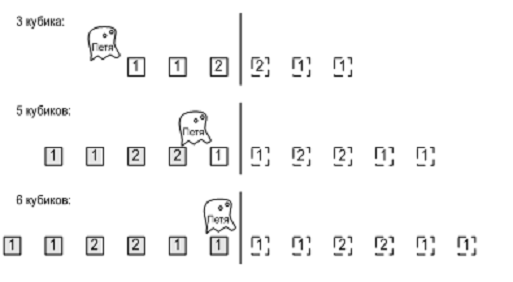

In [93]:
Image(filename='./pictures/19_4_2_D.png')

In [94]:
MODULE = 2_023_000_019
X = 1_000_019

def read_input_file(input_file):
    """Читает входные данные из файла."""
    with open(input_file, 'r') as file:
        n = int(file.readline().split()[0])
        nums = list(map(int, file.readline().split()))
    return n, nums

def init_hash(n, nums):
    """Инициализирует хеш для строки и ее обратной копии."""
    global hash_forward, hash_backward, pow
    hash_forward = [0] * (n + 1)
    hash_backward = [0] * (n + 1)

    pow = [1] * (n + 1)
    for i in range(1, n + 1):
        hash_forward[i] = (hash_forward[i - 1] * X + nums[i - 1]) % MODULE
        hash_backward[i] = (hash_backward[i - 1] * X + nums[n - i]) % MODULE
        pow[i] = (pow[i - 1] * X) % MODULE

def is_palindrome(n, before_mirror):
    """Проверяет, является ли часть строки палиндромом вместе с её отражением."""
    length = before_mirror * 2
    right_hash = (hash_forward[length] + hash_backward[n - length] * pow[length] ) % MODULE
    left_hash = (hash_backward[n] + hash_forward[0] * pow[length] ) % MODULE
    return left_hash == right_hash

def find_possible_k(n, nums):
    """Находит все возможные значения K."""
    init_hash(n, nums)
    possible_k = []

    for i in range(1,n//2+1):
        if is_palindrome(n, i):
            possible_k.append(n - i)
    possible_k.append(n)
    return possible_k


def solution1(input_file):
    """Основная функция, выполняющая задачу."""
    n, nums = read_input_file(input_file)
    result = find_possible_k(n, nums)
    return ' '.join(map(str,result))


# print(solution1('input.txt'))


In [95]:
solution1(TEST_FOLDER + 'test_19_01.txt')

'5 3 6'

In [96]:
solution1(TEST_FOLDER + 'test_19_16.txt')

'99582 99108 96667 50000 100000'

### Задача 20. Подпалиндромы

Ограничение времени: 3 секунды  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Строка считается палиндромом, если она читается одинаково слева направо и справа налево, как, например, строки "abba" и "ata". Ваша задача — написать программу, которая определяет количество подстрок в данной строке, которые являются палиндромами.

**Формат ввода:**  
Вводится одна строка, состоящая из прописных латинских букв. Длина строки не превышает 100000 символов.

**Формат вывода:**  
Выведите одно число — количество подстрок данной строки, которые являются палиндромами.

**Пример 1:**  
Ввод | Вывод
-----|------
aaa  | 6

**Пример 2:**  
Ввод | Вывод
-----|------
aba  | 4

***задача c занятия 2 тренировок Яндекса по алгоритмам 4.0 зима 2023 ([E. Подпалиндромы](https://contest.yandex.ru/contest/53030/problems/E/))***


In [97]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает строку s"""
    with open(input_file, 'r') as file:
        s = file.readline().strip()
    return s

def modify_string(s):
    """Модифицирует строку добавляя между символами специальный символ для учета четных длин палиндромов"""
    char = '#'
    if not s:
        return char+'<'
    return '>' + char + char.join(s) + char + '<'

def count_subpalindromes(s):
    """Считает количество подпалиндров в строке"""
    modified_s = modify_string(s)
    n = len(modified_s)
    dp = [0] * n
    center, radius = 0, 0

    for i in range(1, n - 1):
        mirror = 2 * center - i
        if i < radius:
            dp[i] = min(radius - i, dp[mirror])

        # Попытка расширить палиндром вокруг i
        while modified_s[i + 1 + dp[i]] == modified_s[i - 1 - dp[i]]:
            dp[i] += 1

        # Обновление центра и радиуса, если нашли больший палиндром
        if i + dp[i] > radius:
            center, radius = i, i + dp[i]

    # Подсчет палиндромов
    total = 0
    for i in range(n - 1):
        total += dp[i] // 2
    return total

def solution1(input_file):
    """Основная функция, выполняющая задачу"""
    s = read_input_file(input_file)
    result = count_subpalindromes(s) + len(s)
    return result

# Пример вызова функции
# print(solution1('input.txt'))

In [98]:
print(solution1(TEST_FOLDER + 'test_20_01.txt'))

6


In [99]:
print(solution1(TEST_FOLDER + 'test_20_02.txt'))

4


### Задача 21. Андрей и кислота

Ограничение времени: 2 секунды  
Ограничение памяти: 512Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Андрей работает в секретной химической лаборатории, где производят опасную кислоту с удивительными свойствами. У Андрея есть $n$ бесконечно больших резервуаров, расположенных в ряд. Изначально каждый резервуар содержит некоторое количество кислоты. Начальство требует, чтобы во всех резервуарах было одинаковое количество кислоты. К сожалению, аппарат для разлива кислоты несовершенен: за одну операцию он может добавить по одному литру кислоты в каждый из первых $k$ резервуаров (1 ≤ $k$ ≤ $n$). Обратите внимание, что $k$ может быть разным для разных операций. Так как кислота очень дорогая, из резервуаров нельзя выливать кислоту. Ваша задача - определить, можно ли уравнять объемы кислоты в резервуарах, и если да, то какое минимальное количество операций для этого потребуется.

**Формат ввода:**  
В первой строке входных данных содержится число $n$ (1 ≤ $n$ ≤ 100000) — количество резервуаров. Во второй строке находятся n целых чисел $a_i$ (1 ≤ $a_i$ ≤ $10^9$), где $a_i$ обозначает начальный объем кислоты в i-м резервуаре в литрах.

**Формат вывода:**  
Если возможно уравнять объемы кислоты в резервуарах, выведите минимальное количество операций, необходимых для этого. Если это невозможно, выведите «-1».

**Пример 1:**  
Ввод | Вывод  
-----|------
2<br>1 2 | 1

**Пример 2:**  
Ввод | Вывод  
-----|------
5<br>1 1 5 5 5 | 4

**Пример 3:**  
Ввод | Вывод  
-----|------
3<br>3 2 1 | -1

**Примечания:**  
В первом примере достаточно одной операции с $k$, равным 1. Тогда в обоих резервуарах окажется по 2 литра.  
Во втором примере достаточно четырех операций с $k$, равным 2. Тогда во всех резервуарах окажется по 5 литров.  
В третьем примере объемы уравнять невозможно.  

***Первая задача c вводной лекции [Как и зачем изучать алгоритмы](https://www.youtube.com/live/o3IXpX8wxjQ?si=GlFOw_tg9qZcGOK9&t=4855) перед тренировками Яндекса по алгоритмам 3.0 от 9 февраля 2023  

К сожалению после лекции доступ к этому контексту был закрыт, поэтому я оставлю тут ссылку на эту задачу из контекста зимней школы зима 2022 при отборе на backend ([A. Андрей и кислота](https://contest.yandex.ru/contest/28412/problems/A/))***


In [100]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        lines = file.readlines()
        n = int(lines[0])
        nums = list(map(int, lines[1].split()))
    return n, nums

def check_increasing_sequence(n, nums):
    """Проверяет, возрастает ли последовательность, и вычисляет разницу между последним и первым элементом"""
    for i in range(n - 1):
        if nums[i] > nums[i + 1]:
            return -1
    return nums[-1] - nums[0]

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    n, nums = read_input_file(input_file)
    result = check_increasing_sequence(n, nums)
    return result

# Пример вызова функции
# print(solution('input.txt'))


In [101]:
print(solution(TEST_FOLDER + 'test_21_01.txt'))

1


In [102]:
print(solution(TEST_FOLDER + 'test_21_02.txt'))

4


In [103]:
print(solution(TEST_FOLDER + 'test_21_03.txt'))

-1


### Задача 22. Через тернии к клиенту

Ограничение времени: 5 секунд  
Ограничение памяти: 512Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Известная компания "Тындекс" идёт в ногу со временем — с началом активных космических перелётов в компании открылся сервис "Тындекс.Ракетакси". Пользователю необходимо лишь указать координаты начала и конца перелёта, после чего за ним вылетит персональная ракета. По сути любой заказ можно описать в виде событий четырёх типов:

- **A** (accepted) - заказ принят в работу (ракета вылетела за клиентом);  
- **B** (boarding) - клиент сел в ракету;  
- **S** (success) - заказ успешно завершён (клиент вышел на планете назначения);  
- **C** (cancelled) - заказ отменён.

Все происходящие с ракетами события отправляются на сервера, где сразу логируются. Из-за проблем со связью (метеоритные потоки, вспышки на звездах и т.д.) отправка событий иногда затягивается, и записи в логе могут идти не по порядку.

Гарантируется, что все описанные в логе события задают один из следующих сценариев:
- **A** - **B** - **S**  
- **A** - **B** - **C**  
- **A** - **C**  

Ваша задача — как главному аналитику (и по совместительству главному программисту) ракетопарка, исследовать лог за прошедший год и определить для каждой ракеты суммарное время движения (в минутах) в течение заказов.

В каждый момент времени ракета:
- либо стоит на месте в ожидании заказа,
- либо перемещается по космосу, выполняя заказ.

Движение начинается после принятия заказа и завершается после его отмены или завершения. За одну минуту не может произойти несколько событий, связанных с одной и той же ракетой.

**Формат ввода:**  
В первой строке дано целое число $N$ (2 ≤ $N$ ≤ 200,000) — количество записей в логе.  
Следующие $N$ строк содержат записи в логе в формате *day hour minute id status*:

- *day* (1 ≤ $d$ ≤ 365) — номер дня (сквозная нумерация с начала календарного года);
- *hour* (0 ≤ $h$ < 24) — часы;
- *minute* (0 ≤ $m$ < 60) — минуты;
- *id* (0 ≤ $id$ ≤ $10^9$) — уникальный идентификатор ракеты;
- *status* ∈ {**A**,**B**,**S**,**C**} — буква, обозначающая тип события.

**Формат вывода:**  
В единственной строке выведите через пробел суммарное время движения на заказах для каждой упомянутой в логе ракеты.  
Данные необходимо выводить в порядке возрастания идентификаторов ракет.

**Пример:**

**Пример:**

| Ввод                            | Вывод    |
|---------------------------------|----------|
| 8<br>50 7 25 3632 A<br>14 23 52 212372 S<br>15 0 5 3632 C<br>14 21 30 212372 A<br>50 7 26 3632 C<br>14 21 30 3632 A<br>14 21 40 212372 B<br>14 23 52 3632 B| 156 142  |


**Примечания:**  
*Ракета №3632:*
- в 14-й день года в 21:30 получила заказ (шестая запись в логе);
- забрала пассажира в 23:52 того же дня (восьмая запись в логе);
- заказ был отменён в 15-й день года в 00:05 (третья запись в логе);
- в 50-й день года в 7:25 получила заказ (первая запись в логе);
- заказ был отменён через минуту (четвёртая запись в логе).

Таким образом, ракета №3632 провела в движении с 14-го дня 21:30 до 15-го дня 00:05 и с 50-го дня 7:25 до 50-го дня 7:26 — всего **156** минут.

*Ракета №212372:*
- в 14-й день года в 21:30 получила заказ (третья запись в логе);
- через 10 минут забрала пассажира (седьмая запись в логе);
- в 23:52 прибыла на место назначения (вторая запись в логе).

Всего ракета №212372 провела в движении с 14-го дня 21:30 до 14-го дня 23:52 — **142** минуты.

***Вторая задача c вводной лекции [Как и зачем изучать алгоритмы](https://www.youtube.com/live/o3IXpX8wxjQ?si=GlFOw_tg9qZcGOK9&t=4855) перед тренировками Яндекса по алгоритмам 3.0 от 9 февраля 2023  

К сожалению после лекции доступ к этому контексту был закрыт, поэтому я не смог проверить ее на контексте. Если вы знаете ссылку на контекст для этой задачи, с удовольствием добавлю сюда ссылку***


In [104]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        lines = file.readlines()
    return lines[1:]  # Возвращаем все строки кроме первой, так как в ней указано количество записей.


def calculate_event_time(events):
    """Вычисляет суммарное время движения для каждой ракеты"""
    event_time_by_rocket_id = {}
    for event in events:
        parts = event.split()

        status = parts[4]
        if status == 'B':  # Пропускаем событие 'B'
            continue

        vector = -1 if status == 'A' else 1

        day, hour, minute, rocket_id = map(int, parts[:4])
        minute = (day * 24 + hour) * 60 + minute

        event_time_by_rocket_id[rocket_id] = event_time_by_rocket_id.get(rocket_id, 0) + vector * minute

    return event_time_by_rocket_id


def solution(input_file):
    """Основная функция, выполняющая задачу"""
    events = read_input_file(input_file)
    event_time_by_rocket_id = calculate_event_time(events)
    # Сортируем результаты по идентификаторам ракет
    for id_rocket in sorted(event_time_by_rocket_id):
        print(event_time_by_rocket_id[id_rocket], end=' ')

# Пример вызова функции
# solution('input.txt')


In [105]:
solution(TEST_FOLDER + 'test_22_01.txt')

156 142 

**Примечание к решению:** я не стал делать сортировку событий внутри функции, чтобы они шли последовательно, чтобы, например, не было переполнения. Python должен справиться с задачей, даже если первые 100000 событий имеют статус "A" и соответствующие им временные отметки высоки. Переполнения стека при этом не произойдет, поскольку операции проводятся с использованием стандартных библиотек Python, которые оптимизированы для работы с большими числами.  
А дополнительная сортировка в функции уведичивает сложность до Nlog(N), вместо текущей N.

In [106]:
# Генерируем события для теста
events = []
for i in range(100000):
    # Задаем большое время для завершения поездок, чтобы проверить переполнение стека для одной ракеты
    events.append(f"365 23 59 1 C")  # Максимальное время со статусом 'C'

# Проверяем, что получится в словаре после обработки всех событий
events_by_rocket_id = calculate_event_time(events)

# Выводим полученное время для суммы завершения поездки для ракеты 1
events_by_rocket_id

{1: 52703900000}

### Задача 23. Гистограмма

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Вовочка ломает систему безопасности Пентагона. Для этого ему понадобилось узнать, какие символы в секретных зашифрованных посланиях употребляются чаще других. Для удобства изучения Вовочка хочет получить графическое представление встречаемости символов. Поэтому он хочет построить гистограмму количества символов в сообщении. Гистограмма — это график, в котором каждому символу, встречающемуся в сообщении хотя бы один раз, соответствует столбик, высота которого пропорциональна количеству этих символов в сообщении.

**Формат ввода:**  
Входной файл содержит зашифрованный текст сообщения. Он содержит строчные и прописные латинские буквы, цифры, знаки препинания («.», «!», «?», «:», «-», «,», «;», «(», «)»), пробелы и переводы строк. Размер входного файла не превышает 10000 байт. Текст содержит хотя бы один непробельный символ. Все строки входного файла не длиннее 200 символов. Для каждого символа $c$ кроме пробелов и переводов строк выведите столбик из символов «#», количество которых должно быть равно количеству символов $c$ в данном тексте. Под каждым столбиком напишите символ, соответствующий ему. Отформатируйте гистограмму так, чтобы нижние концы столбиков были на одной строке, первая строка и первый столбец были непустыми. Не отделяйте столбики друг от друга. Отсортируйте столбики в порядке увеличения кодов символов.

**Формат вывода:**  
Для каждого символа $c$ кроме пробелов и переводов строк выведите столбик из символов «#», количество которых должно быть равно количеству символов $c$ в данном тексте. Под каждым столбиком напишите символ, соответствующий ему. Отформатируйте гистограмму так, чтобы нижние концы столбиков были на одной строке, первая строка и первый столбец были непустыми. Не отделяйте столбики друг от друга. Отсортируйте столбики в порядке увеличения кодов символов.

**Пример 1:**  

| Ввод          | Вывод          |
|---------------|----------------|
| Hello, world! | <pre>     #   <br>     ##  <br>#########<br>!,Hdelorw</pre> |

**Пример 2:**  

| Ввод          | Вывод          |
|---------------|----------------|
| Twas brillig, and the slithy toves<br>Did gyre and gimble in the wabe;<br>All mimsy were the borogoves,<br>And the mome raths outgrabe. | <pre>         #              <br>         #              <br>         #              <br>         #              <br>         #              <br>         #              <br>         #         #    <br>         #  #      #    <br>      #  # ###  ####    <br>      ## ###### ####    <br>      ##############    <br>      ##############  ##<br>#  #  ############## ###<br>########################<br>,.;ADTabdeghilmnorstuvwy</pre> |

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([1. Гистограмма](https://contest.yandex.ru/contest/45468/problems/1/))***


Решение для контекста без встроенных функций


In [107]:
def read_input_file(input_file):
    """Функция для чтения содержимого входного файла"""
    with open(input_file, 'r') as file:
        content = file.read()
    return content

def calculate_character_counts(text):
    """
    Функция подсчитывает частоты символов в тексте, исключая пробелы и переводы строк.
    Возвращает словарь частот и максимальное значение частоты.
    """
    counter_ = {}
    max_count = 0
    for char in text:
        if char != " " and char != "\n":
            counter_[char] = counter_.get(char, 0) + 1
            max_count = max(max_count, counter_[char])
    return counter_, max_count

def create_histogram(content):
    """Функция для создания и печати гистограммы частоты символов"""
    counter, max_count = calculate_character_counts(sorted(content))

    # Генерируем и печатаем строки гистограммы от максимального к минимальному количеству вхождений
    for i in range(max_count, 0, -1):
        line = ''
        for char, count in counter.items():
            line += '#' if count >= i else ' '
        print(line)
    # Добавляем строку с символами в порядке увеличения их кодов
    print(''.join(counter.keys()))

def solution(input_path):
    """Основная функция, выполняющая задачу"""
    content = read_input_file(input_path)
    create_histogram(content)

# solution('input.txt')  # Код для контекста закомментирован

In [108]:
solution(TEST_FOLDER + 'test_23_01.txt')

     #   
     ##  
#########
!,Hdelorw


In [109]:
solution(TEST_FOLDER + 'test_23_02.txt')

         #              
         #              
         #              
         #              
         #              
         #         #    
         #  #      #    
      #  # ###  ####    
      ## ###### ####    
      ##############    
      ##############  ##
#  #  ############## ###
########################
,.;ADTabdeghilmnorstuvwy


### Задача 24. Красивая строка

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Красотой строки назовем максимальное число идущих подряд одинаковых букв. (красота строки `abcaabdddettq` равна 3)

Сделайте данную вам строку как можно более красивой, если вы можете сделать не более $k$ операций замены символа.

**Формат ввода:**  
В первой строке записано одно целое число $k$ (0 ≤ $k$ ≤ 10^9)

Во второй строке дана непустая строчка $S$ ($|S|$ ≤ 2 ⋅ 10^5). Строчка $S$ состоит только из маленьких латинских букв.

**Формат вывода:**  
Выведите одно число — максимально возможную красоту строчки, которую можно получить.

**Пример 1:**  
Ввод | Вывод  
-----|------
2<br>abcaz | 4

**Пример 2:**  
Ввод | Вывод  
-----|------
2<br>helto | 3

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([2. Красивая строка](https://contest.yandex.ru/contest/45468/problems/2/))***

In [110]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает k и строку S."""
    with open(input_file, 'r') as file:
        k = int(file.readline())
        s = file.readline().strip()
    return k, s

def index_char(char):
    return ord(char) - ord('a')

def calculate_max_beauty(k, s):
    """Вычисляет максимально возможную красоту строки после k операций замены."""
    w = [0] * 26  # Инициализация списка для подсчета частот букв
    max_freq = 0
    p = 0
    for i, char in enumerate(s):
        char_index = index_char(char)

        w[char_index] += 1
        max_freq = max(max_freq, w[char_index])

        if max_freq + k - 1 < i - p:
            w[index_char(char)] -= 1
            p += 1
    return len(s) - p

def solution(input_file):
    """Основная функция, выполняющая задачу."""
    k, s = read_input_file(input_file)
    return calculate_max_beauty(k, s)

# # Пример вызова функции
# print(solution('input.txt'))

In [111]:
print(solution(TEST_FOLDER + 'test_24_01.txt'))

4


In [112]:
print(solution(TEST_FOLDER + 'test_24_02.txt'))

3


### Задача 25. Коллекционер Диего

Ограничение времени: 2 секунды  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Диего увлекается коллекционированием наклеек. На каждой из них написано число, и каждый коллекционер мечтает собрать наклейки со всеми встречающимися числами.

Диего собрал $N$ наклеек, некоторые из которых, возможно, совпадают. Как-то раз к нему пришли $K$ коллекционеров. $i$-й из них собрал все наклейки с номерами не меньшими, чем $p_i$. Напишите программу, которая поможет каждому из коллекционеров определить, сколько недостающих ему наклеек есть у Диего. Разумеется, гостей Диего не интересуют повторные экземпляры наклеек.

**Формат ввода:**  
В первой строке содержится единственное число $N$ (0 ≤ $N$ ≤ 100 000) — количество наклеек у Диего.

В следующей строке содержатся $N$ целых неотрицательных чисел (не обязательно различных) — номера наклеек Диего. Все номера наклеек не превосходят $10^9$.

В следующей строке содержится число $K$ (0 ≤ $K$ ≤ 100 000) — количество коллекционеров, пришедших к Диего. В следующей строке содержатся $K$ целых чисел $p_i$ (0 ≤ $p_i$ ≤ $10^9$), где $p_i$ — наименьший номер наклейки, не интересующий $i$-го коллекционера.

**Формат вывода:**  
Для каждого коллекционера в отдельной строке выведите количество различных чисел на наклейках, которые есть у Диего, но нет у этого коллекционера.

**Пример 1:**  
Ввод | Вывод  
-----|------
1<br>5<br>2<br>4 6 | 0<br>1

**Пример 2:**  
Ввод | Вывод  
-----|------
3<br>100 1 50<br>3<br>300 0 75 | 3<br>0<br>2

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([3. Коллекционер Диего](https://contest.yandex.ru/contest/45468/problems/3/))***


In [113]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        diego_stickers = list(map(int, file.readline().split()))
        k = int(file.readline())
        min_collectors_stickers = list(map(int, file.readline().split()))
    return n, diego_stickers, k, min_collectors_stickers

def find_missing_stickers(diego_stickers, min_collectors_stickers):
    """Определяет количество недостающих наклеек для каждого коллекционера"""
    diego_card_set = sorted(set(diego_stickers))
    missing_stickers_counts = []

    def check(m, param):
        return diego_card_set[m] >= param

    def lbinsearch(l, r, check, param):
        while l < r:
            m = (l + r) // 2
            if check(m, param):
                r = m
            else:
                l = m + 1
        return l

    for min_sticker_value in min_collectors_stickers:
        # Используем левый бинарный поиск для определения количества наклеек меньше max_value
        left_index = lbinsearch(0, len(diego_card_set), check, min_sticker_value)
        missing_stickers_counts.append(str(left_index))

    return missing_stickers_counts

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    n, diego_stickers, k, min_collectors_stickers = read_input_file(input_file)
    if n == 0:
        print('\n'.join(['0'] * k))
    elif k != 0:
        missing_counts = find_missing_stickers(diego_stickers, min_collectors_stickers)
        print('\n'.join(missing_counts))

# solution('input.txt')  # Код для контекста закомментирован


In [114]:
solution(TEST_FOLDER + 'test_25_01.txt')

0
1


In [115]:
solution(TEST_FOLDER + 'test_25_02.txt')

3
0
2


In [116]:
# я создал дополнительный тест чтобы проверить алгоритм на границе равенства карточек у Диего и коллекционера
read_print_test(TEST_FOLDER + 'test_25_03.txt')
solution(TEST_FOLDER + 'test_25_03.txt')

------------------Содержание теста: ./tests/test_25_03.txt-----------------
3
100 100 100
3
99 100 101
-----------------------------Конец файла теста-----------------------------
0
0
1


In [117]:
# я создал дополнительный тест чтобы проверить вывод при нулевых значениях N и K
read_print_test(TEST_FOLDER + 'test_25_04.txt')
solution(TEST_FOLDER + 'test_25_04.txt')

------------------Содержание теста: ./tests/test_25_04.txt-----------------
0

3
0 0 0
-----------------------------Конец файла теста-----------------------------
0
0
0


### Задача 26. Контрольная работа

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Петя и Вася — одноклассники и лучшие друзья, поэтому они во всём помогают друг другу. Завтра у них контрольная по математике, и учитель подготовил целых $K$ вариантов заданий.

В классе стоит один ряд парт, за каждой из них (кроме, возможно, последней) на контрольной будут сидеть ровно два ученика. Ученики знают, что варианты будут раздаваться строго по порядку: правый относительно учителя ученик первой парты получит вариант 1, левый — вариант 2, правый ученик второй парты получит вариант 3 (если число вариантов больше двух) и т.д. Так как $K$ может быть меньше чем число учеников $N$, то после варианта $K$ снова выдаётся вариант 1. На последней парте в случае нечётного числа учеников используется только место 1.

Петя самым первым вошёл в класс и сел на своё любимое место. Вася вошёл следом и хочет получить такой же вариант, что и Петя, при этом сидя к нему как можно ближе. То есть между ними должно оказаться как можно меньше парт, а при наличии двух таких мест с равным расстоянием от Пети Вася сядет позади Пети, а не перед ним. Напишите программу, которая подскажет Васе, какой ряд и какое место (справа или слева от учителя) ему следует выбрать. Если же один и тот же вариант Вася с Петей писать не смогут, то выдайте одно число  - 1.

**Формат ввода:**  
В первой строке входных данных находится количество учеников в классе $2 ≤ N ≤ 10^9$. Во второй строке — количество подготовленных для контрольной вариантов заданий $2 ≤ K ≤ N$. В третьей строке — номер ряда, на который уже сел Петя, в четвёртой — цифра 1, если он сел на правое место, и 2, если на левое.

**Формат вывода:**  
Если Вася никак не сможет писать тот же вариант, что и Петя, то выведите  - 1. Если решение существует, то выведите два числа — номер ряда, на который следует сесть Васе, и 1, если ему надо сесть на правое место, или 2, если на левое. Разрешается использовать только первые $N$ мест в порядке раздачи вариантов.

**Пример 1:**  
Ввод | Вывод  
-----|------
25<br>2<br>1<br>2 | 2 2

**Пример 2:**  
Ввод | Вывод  
-----|------
25<br>13<br>7<br>1 | -1

**Примечания:**  
В первом примере вариантов 2, поэтому наилучшее место для Васи находится сразу за Петей. Во втором примере Петя будет единственным, кто получит вариант 13.

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([4. Контрольная работа](https://contest.yandex.ru/contest/45468/problems/4/))***


In [118]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        k = int(file.readline())
        row = int(file.readline())
        place = int(file.readline())
    return n, k, row, place

def find_row_place(n, k, row, place):
    """Определяет место для Васи на основе заданных параметров"""

    def inverse_hash_function(row, place):
        """Возвращает позицию (порядковый номер места в классе) по номеру ряда и месту"""
        return (row - 1) * 2 + place

    def hash_function(position):
        """Возвращает ряд и место по позиции (порядковый номер места в классе)"""
        row = (position - 1) // 2 + 1
        place = 2 if position % 2 == 0 else 1
        return row, place

    position = inverse_hash_function(row, place)

    options = []
    if position - k > 0:  # если есть место впереди Пети
        options.append(hash_function(position - k))
    if position + k <= n:  # если есть место позади Пети
        options.append(hash_function(position + k))

    if options:
        if len(options) > 1:
            # Если есть несколько вариантов, выбираем ближайший к Пете
            # если расстояния равны выбираем вариант позади Пети
            row_before_petia = options[0][0]
            row_after_petia = options[1][0]
            if row - row_before_petia < row_after_petia - row:
                return options[0]
            else:
                return options[1]
        else:
            return options[0]

    return -1, -1

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    n, k, row, place = read_input_file(input_file)
    result_row, result_place = find_row_place(n, k, row, place)
    return f"{result_row} {result_place}" if result_row != -1 else "-1"

# print(solution('input.txt'))  # Код для контекста закомментирован

In [119]:
print(solution(TEST_FOLDER + 'test_26_01.txt'))

2 2


In [120]:
print(solution(TEST_FOLDER + 'test_26_02.txt'))

-1


### Задача 27. Хорошая строка

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

На день рождения маленький Ипполит получил долгожданный подарок — набор дощечек с написанными на них буквами латинского алфавита. Теперь-то ему будет чем заняться долгими вечерами, тем более что мама обещала подарить ему в следующем году последовательность целых неотрицательных чисел, если он хорошо освоит этот набор. Ради такого богатства Ипполит готов на многое.

Прямо сейчас юный исследователь полностью поглощён изучением хорошести строк. Хорошестью строки называется количество позиций от 1 до $L - 1$ (где $L$ — длина строки), таких, что следующая буква в строке является следующей по алфавиту. Например, хорошесть строки "abcdefghijklmnopqrstuvwxyz" равна 25, а строки "abdc" — только 1.

Ипполит размышляет над решением закономерно возникающей задачи: чему равна максимально возможная хорошесть строки, которую можно собрать, используя дощечки из данного набора? Вы-то и поможете ему с ней справиться.

**Формат ввода:**  
Первая строка ввода содержит единственное целое число $N$ — количество различных букв в наборе $(1 ≤ N ≤ 26)$. Обратите внимание: в наборе всегда используются $N$ первых букв латинского алфавита.

Следующие $N$ строк содержат целые положительные числа $c_i$ — количество букв соответствующего типа $(1 ≤ c_i ≤ 10^9)$. Таким образом, первое число означает количество букв "a", второе число задаёт количество букв "b" и так далее.

**Формат вывода:**  
Выведите единственное целое число — максимально возможную хорошесть строки, которую можно собрать из имеющихся дощечек.

**Пример 1:**  
Ввод | Вывод  
-----|------
3<br>1<br>1<br>1 | 2

**Пример 2:**  
Ввод | Вывод  
-----|------
2<br>3<br>4 | 3

**Примечания:**  
В первом тесте имеется по одной дощечке с каждой из 3 различных букв. Ответ 2 достигается на строке "abc".

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([5. Хорошая строка](https://contest.yandex.ru/contest/45468/problems/5/))***


In [121]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        letters_counts = [int(file.readline()) for _ in range(n)]
    return n, letters_counts

def calculate_goodness(n, letters_counts):
    """Рассчитывает максимально возможную хорошесть строки"""
    goodness = 0
    # в цикле проверяем, если следующее число букв не убывает, тогда записаваем текущее число букв в сумму
    # потому что это означает что для всех текущих букв найдется следующая по порядку буква
    # если убывает, тогда записываем следующее число букв в сумму
    # по сути хорошесть определяется как сумма минимальных значений для каждой пары соседних букв
    for i in range(n - 1):
        goodness += min(letters_counts[i], letters_counts[i + 1])
    return goodness

def solution(input_file):
    """Основная функция, выполняющая задачу."""
    n, letters_counts = read_input_file(input_file)
    result = calculate_goodness(n, letters_counts)
    return result

# print(solution('input.txt'))  # Код для контекста закомментирован


In [122]:
print(solution(TEST_FOLDER + 'test_27_01.txt'))

2


In [123]:
print(solution(TEST_FOLDER + 'test_27_02.txt'))

3


### Задача 28. Операционные системы lite

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Васин жесткий диск состоит из $M$ секторов. Вася последовательно устанавливал на него различные операционные системы следующим методом: он создавал новый раздел диска из последовательных секторов, начиная с сектора номер $a_i$ и до сектора $b_i$ включительно, и устанавливал на него очередную систему. При этом, если очередной раздел хотя бы по одному сектору пересекается с каким-то ранее созданным разделом, то ранее созданный раздел «затирается», и операционная система, которая на него была установлена, больше не может быть загружена.

Напишите программу, которая по информации о том, какие разделы на диске создавал Вася, определит, сколько в итоге работоспособных операционных систем установлено и работает в настоящий момент на Васином компьютере.

**Формат ввода:**  
Сначала вводятся натуральное число $M$ — количество секторов на жестком диске $(1 ≤ M ≤ 10^9)$ и целое число $N$ — количество разделов, которое последовательно создавал Вася $(0 ≤ N ≤ 1000)$.

Далее идут $N$ пар чисел $a_i$ и $b_i$, задающих номера начального и конечного секторов раздела $(1 ≤ a_i ≤ b_i ≤ M)$.

**Формат вывода:**  
Выведите одно число — количество работающих операционных систем на Васином компьютере.

**Пример 1:**  
Ввод | Вывод  
-----|------
10<br>3<br>1 3<br>4 7<br>3 4 | 1

**Пример 2:**  
Ввод | Вывод  
-----|------
10<br>4<br>1 3<br>4 5<br>7 8<br>4 6 | 3

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([6. Операционные системы lite](https://contest.yandex.ru/contest/45468/problems/6/))***

In [124]:
def read_input_file(input_file):
    """Читает входные данные из файла."""
    with open(input_file, 'r') as file:
        m = int(file.readline())
        n = int(file.readline())
        intervals = [tuple(map(int, file.readline().split())) for _ in range(n)]
    return m, intervals

def filter_overlapping_intervals(intervals):
    """Проверяет пересечения следующего интервала операционной системы с существующими
    и при наличии пересечений удаляет предыдущие операционную систему"""

    def check_intersect(interval1, interval2):
        return interval1[0] <= interval2[1] and interval2[0] <= interval1[1]

    final_intervals = []
    for new in intervals:
        final_intervals = [old for old in final_intervals if not check_intersect(new, old)]
        final_intervals.append(new)
    return final_intervals

def solution(input_file):
    """Основная функция, выполняющая задачу."""
    m, intervals = read_input_file(input_file)
    final_intervals = filter_overlapping_intervals(intervals)
    return len(final_intervals)

# print(solution('input.txt'))  # Код для контекста закомментирован


In [125]:
print(solution(TEST_FOLDER + 'test_28_01.txt'))

1


In [126]:
print(solution(TEST_FOLDER + 'test_28_02.txt'))

3


### Задача 29. SNTP

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Для того чтобы компьютеры поддерживали актуальное время, они могут обращаться к серверам точного времени SNTP (Simple Network Time Protocol). К сожалению, компьютер не может просто получить время у сервера, потому что информация по сети передаётся не мгновенно: пока сообщение с текущим временем дойдёт до компьютера, оно потеряет свою актуальность. Протокол взаимодействия клиента (компьютера, запрашивающего точное время) и сервера (компьютера, выдающего точное время) выглядит следующим образом:

1. Клиент отправляет запрос на сервер и запоминает время отправления $A$ (по клиентскому времени).

2. Сервер получает запрос в момент времени $B$ (по точному серверному времени) и отправляет клиенту сообщение, содержащее время $B$.

3. Клиент получает ответ на свой запрос в момент времени $C$ (по клиентскому времени) и запоминает его. Теперь клиент, из предположения, что сетевые задержки при передаче сообщений от клиента серверу и от сервера клиенту одинаковы, может определить и установить себе точное время, используя известные значения $A$, $B$, $C$.

Вам предстоит реализовать алгоритм, с точностью до секунды определяющий точное время для установки на клиенте по известным $A$, $B$ и $C$. При необходимости округлите результат до целого числа секунд по правилам арифметики (в меньшую сторону, если дробная часть числа меньше 1/2, иначе в большую сторону).

Возможно, что, пока клиент ожидал ответа, по клиентскому времени успели наступить новые сутки, однако известно, что между отправкой клиентом запроса и получением ответа от сервера прошло менее 24 часов.

**Формат ввода:**  
Программа получает на вход три временные метки $A$, $B$, $C$, по одной в каждой строке. Все временные метки представлены в формате «hh:mm:ss», где «hh» – это часы, «mm» – минуты, «ss» – секунды. Часы, минуты и секунды записываются ровно двумя цифрами каждое (возможно, с дополнительными нулями в начале числа).

**Формат вывода:**  
Программа должна вывести одну временную метку в формате, описанном во входных данных, – вычисленное точное время для установки на клиенте. В выводе не должно быть пробелов, пустых строк в начале вывода.

**Пример:**  
Ввод | Вывод  
-----|------
15:01:00<br>18:09:45<br>15:01:40 | 18:10:05

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([7. SNTP](https://contest.yandex.ru/contest/45468/problems/7/))***


**Описание решения задачи 29. SNTP:**  
1. Проводим вычисления в минимальной единице измерения, в данном случае в секундах. 
2. Расчёт дельты времени: вычисляется как половина времени прохождения сигнала от клиента к серверу и обратно. Если время ответа больше времени запроса, используется простая разность между этими метками. В случае, если время ответа меньше времени запроса, предполагается, что ответ получен на следующий день, и к расчёту добавляется время, прошедшее с момента запроса до конца суток. В оба этих выражения добавляется +1 перед делением на 2 для арифметического округления результата до ближайшего целого числа, согласно указанному в условии задачи способа округления.
3. Корректировка серверного времени: После вычисления дельты, к времени сервера добавляется полученное значение дельты, которая корректно обрабатывает переходы через границы минут и часов, возвращая исправленное время в исходном формате "hh:mm:ss"

In [127]:
SECONDS_IN_DAY = 24 * 3600

def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        request_time = file.readline()
        server_time = file.readline()
        response_time = file.readline()
    return request_time, server_time, response_time

def time_in_seconds(time_str):
    """Преобразует время из формата hh:mm:ss в секунды"""
    hours, minutes, seconds = map(int, time_str.split(":"))
    return hours * 3600 + minutes * 60 + seconds

def add_seconds_to_time(time_str, delta_seconds):
    """Добавляет секунды к времени, представленному в формате hh:mm:ss"""
    total_seconds = time_in_seconds(time_str) + delta_seconds
    total_seconds %= SECONDS_IN_DAY  # Приводим к диапазону 0 - 86399
    hours, minutes_and_seconds = divmod(total_seconds, 3600)
    minutes, seconds = divmod(minutes_and_seconds, 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    request_time, server_time, response_time = read_input_file(input_file)
    request_seconds = time_in_seconds(request_time)
    response_seconds = time_in_seconds(response_time)

    delta = (
        (response_seconds - request_seconds + 1) // 2
        if request_seconds <= response_seconds
        else (SECONDS_IN_DAY - request_seconds + response_seconds + 1) // 2
    )
    correct_server_time = add_seconds_to_time(server_time, delta)
    return correct_server_time

# print(solution('input.txt'))  # Код для контекста закомментирован


In [128]:
print(solution(TEST_FOLDER + 'test_29_01.txt'))

18:10:05


### Задача 30. Минимальный прямоугольник

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

На клетчатой плоскости закрашено $K$ клеток. Требуется найти минимальный по площади прямоугольник, со сторонами, параллельными линиям сетки, покрывающий все закрашенные клетки.

**Формат ввода**  
Во входном файле, на первой строке, находится число $K$ $(1 ≤ K ≤ 100)$. На следующих $K$ строках находятся пары чисел $X_i$ и $Y_i$ – координаты закрашенных клеток $(|X_i|, |Y_i| ≤ 10^9)$.

**Формат вывода**  
Выведите в выходной файл координаты левого нижнего и правого верхнего углов прямоугольника.

**Пример**  
Ввод | Вывод  
-----|------
3<br>1 1<br>1 10<br>5 5 | 1 1 5 10

***задача c тренировок Яндекса по алгоритмам 3.0 ([8. Минимальный прямоугольник](https://contest.yandex.ru/contest/45468/problems/8/))***

In [129]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        k = int(file.readline())  # Чтение количества точек
        points = [tuple(map(int, file.readline().split())) for _ in range(k)]
    return points

def find_minsquare_rectangle(points):
    """Находит координаты минимального по площади прямоугольника, покрывающего все точки"""
    # Инициализация минимальных и максимальных значений с первой точки
    min_x, min_y = points[0]
    max_x, max_y = points[0]

    # Перебор всех точек для нахождения минимальных и максимальных значений
    for x, y in points[1:]:
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x)
        max_y = max(max_y, y)

    return min_x, min_y, max_x, max_y


def solution(input_file):
    """Основная функция, выполняющая задачу"""
    points = read_input_file(input_file)
    coordinates_min_rectangle = find_minsquare_rectangle(points)
    coordinates_str = ' '.join(map(str, coordinates_min_rectangle))
    return coordinates_str

# Пример использования:
# print(solution('input.txt'))

In [130]:
print(solution(TEST_FOLDER + 'test_30_01.txt'))

1 1 5 10


### Задача 31. Сумма в прямоугольнике

Ограничение времени: 3 секунды  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Вам необходимо ответить на запросы узнать сумму всех элементов числовой матрицы $N \times M$ в прямоугольнике с левым верхним углом $(x_1, y_1)$ и правым нижним $(x_2, y_2)$.

**Формат ввода**  
В первой строке находится числа $N$, $M$ размеры матрицы $(1 \leq N, M \leq 1000)$ и $K$ — количество запросов $(1 \leq K \leq 100000)$. Каждая из следующих $N$ строк содержит по $M$ чисел — элементы соответствующей строки матрицы (по модулю не превосходят 1000). Последующие $K$ строк содержат по 4 целых числа, разделенных пробелом $x_1 y_1 x_2 y_2$ — запрос на сумму элементов матрицы в прямоугольнике $(1 \leq x_1 \leq x_2 \leq N, 1 \leq y_1 \leq y_2 \leq M)$.

**Формат вывода**  
Для каждого запроса на отдельной строке выведите его результат — сумму всех чисел элементов матрицы в прямоугольнике $(x_1, y_1), (x_2, y_2)$.

**Пример**  
Ввод | Вывод  
-----|------
3 3 2<br>1 2 3<br>4 5 6<br>7 8 9<br>2 2 3 3<br>1 1 2 3 | 28<br>21

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([9. Сумма в прямоугольнике](https://contest.yandex.ru/contest/45468/problems/9/))***


**Решение задачи 31. Сумма в прямоугольнике:**
1. Для начала надо заметить, что разбор примера показывает, что ось $x$ откладывается по вертикали, а ось $y$ по горизонтали (21 = 1 + 2 + 3 + 4 + 5 + 6 - это две строки и три столбца начиная с первого по диагонали элемента) при этом формат ввода $x_1 y_1 x_2 y_2$ == 1 1 2 3, следовательно ось $x$ откладывается по вертикали  
2. Вычисляем двумерные префиксные суммы: создает новую матрицу prefix размером $(N+1)\times(M+1)$, где каждый элемент [$i$][$j$] содержит сумму всех элементов подматрицы исходной матрицы matrix от левого верхнего угла (0,0) до текущего элемента ($i-1$,$j-1$). Это достигается путем добавления значения текущего элемента matrix[$i-1$][$j-1$] к сумме элементов слева prefix[$i$][$j-1$], сверху prefix[$i-1$][$j$], и вычитанием суммы элементов, находящихся по диагонали слева сверху prefix[$i-1$][$j-1$], чтобы скомпенсировать двойное добавление этих элементов
3. Вычисляем суммы подматрицы по запросам: пусть запрос $x_1 y_1 x_2 y_2$. То есть, подматрица ограничена верхним левым углом ($x_1$,$y_1$) и нижним правым углом ($x_2$,$y_2$), используя матрицу префиксных сумм. Сначала берем значение префиксной суммы в правом нижнем углу подматрицы prefix[$x_2$][$y_2$], которое представляет сумму всех элементов от (0,0) до ($x_2$,$y_2$). Затем вычитаем суммы элементов, находящихся за пределами интересующей подматрицы сверху prefix[$x_1$-1][$y_2$] и слева prefix[$x_2$][$y_1$-1]. Если при этом вычитании мы вышли за границы подматрицы, то добавляем обратно сумму элементов, которая была вычтена дважды (левый верхний угол подматрицы prefix[$x_1$-1][$y_1$-1])

In [131]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        n, m, k = map(int, file.readline().split())
        matrix = [list(map(int, file.readline().split())) for _ in range(n)]
        queries = [list(map(int, file.readline().split())) for _ in range(k)]
    return n, m, matrix, queries

def calculate_prefix_sum(n, m, matrix):
    """Вычисляет двумерные префиксные суммы для матрицы"""
    prefix = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            prefix[i][j] = matrix[i-1][j-1] + prefix[i-1][j] + prefix[i][j-1] - prefix[i-1][j-1]
    return prefix

def calculate_sub_sum(x1, y1, x2, y2, prefix):
    """Вычисляет сумму подматрицы на основе двумерных префиксных сумм"""
    sum = prefix[x2][y2]
    if x1 > 1: sum -= prefix[x1-1][y2]
    if y1 > 1: sum -= prefix[x2][y1-1]
    if x1 > 1 and y1 > 1: sum += prefix[x1-1][y1-1]
    return sum

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    n, m, matrix, queries = read_input_file(input_file)
    prefix = calculate_prefix_sum(n, m, matrix)
    sums = [calculate_sub_sum(x1, y1, x2, y2, prefix) for x1, y1, x2, y2 in queries]
    return '\n'.join(map(str, sums))

# print(solution('input.txt'))  # Код для контекста закомментирован


In [132]:
print(solution(TEST_FOLDER + 'test_31_01.txt'))

28
21


### Задача 32. Скучная лекция

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Лёша сидел на лекции. Ему было невероятно скучно. Голос лектора казался таким далеким и незаметным...

Чтобы окончательно не уснуть, он взял листок и написал на нём свое любимое слово. Чуть ниже он повторил своё любимое слово, без первой буквы. Ещё ниже он снова написал своё любимое слово, но в этот раз без двух первых и последней буквы.

Тут ему пришла в голову мысль — времени до конца лекции все равно ещё очень много, почему бы не продолжить выписывать всеми возможными способами это слово без какой-то части с начала и какой-то части с конца?

После лекции Лёша рассказал Максу, как замечательно он скоротал время. Максу стало интересно посчитать, сколько букв каждого вида встречается у Лёши в листочке. Но к сожалению, сам листочек куда-то запропастился.

Макс хорошо знает любимое слово Лёши, а ещё у него не так много свободного времени, как у его друга, так что помогите ему быстро восстановить, сколько раз Лёше пришлось выписать каждую букву.

**Формат ввода:**  
На вход подаётся строка, состоящая из строчных латинских букв — любимое слово Лёши.

Длина строки лежит в пределах от 5 до 100 000 символов.

**Формат вывода:**  
Для каждой буквы на листочке Лёши, выведите её, а затем через двоеточие и пробел сколько раз она встретилась в выписанных Лёшей словах (см. формат вывода в примерах). Буквы должны следовать в алфавитном порядке. Буквы, не встречающиеся на листочке, выводить не нужно.

**Пример 1:**  
Ввод | Вывод  
-----|------
hello | e: 8<br>h: 5<br>l: 17<br>o: 5

**Пример 2:**  
Ввод | Вывод  
-----|------
abacaba | a: 44<br>b: 24<br>c: 16

**Примечания:**  
Пояснение к первому примеру. Если любимое Лёшино слово — "hello", то на листочке у Лёши будут выписаны следующие слова:

"hello"

"hell"

"ello"

"hel"

"ell"

"llo"

"he"

"el"

"ll"

"lo"

"h"

"e"

"l"

"l"

"o"

Среди этих слов 8 раз встречается буква "e", 5 раз — буква "h", 17 раз — буква "l" и 5 раз буква "o".

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([10. Скучная лекция](https://contest.yandex.ru/contest/45468/problems/10/))***


**Решение задачи 32. Скучная лекция:**  
Давайте разберемся на примере буквы "c" в слове "abcde", где $n$ — длина слова == 5, а $i$ — позиция буквы "c" ==2, начиная с 0.

1. **Когда вариант оканчиватся буквой 'c' == $(i + 1)$ (от начала строки до включительно буквы 'c')**:
   - Это количество способов, которыми подстрока может начинаться с начала строки и заканчиваться на 'c' или любой предыдущей букве. 
   - В данном случае: "a" до "c" (abc), "b" до "c" (bc), "c" (c). То есть $i + 1 = 2 + 1 = 3$ способа.

2. **Когда вариант начинается сбуквы 'c' ==  $(n - i)$ (от 'c' до конца строки)**:
   - Это количество способов, которыми подстрока может заканчиваться начиная с 'c' и до конца строки.
   - В данном случае: от "c" до "e" (cde), от "c" до "d" (cd), от "c" до "c" (c). То есть $n - i = 5 - 2 = 3$ способа.

Комбинируя эти два расчета используя формулу $(n - i) \times (i + 1)$ , мы учитываем все возможные подстроки, которые включают букву "c":
- Каждый вариант начала может быть сочетан с каждым вариантом окончания. Именно поэтому происходит умножение: каждая возможная начальная точка ('abc', 'bc', 'c') может сочетаться с каждой возможной конечной точкой ('c', 'cd', 'cde').  

**Формула умножения**:
- $(i + 1) \times (n - i)$ является произведением количества возможных начальных точек на количество возможных конечных точек, включающих данную букву.

Таким образом, $3 \times 3 = 9$ подстрок содержат букву "c", начиная с любой позиции от "a" до "c" и заканчивая любой позицией от "c" до "e".

**Также можно воспользоваться таблицей для визуального представления решения:**

Для наглядного представления вариантов комбинаций префиксов, буквы "c", и суффиксов, мы можем воспользоваться следующей таблицей. Префиксы будут расположены по горизонтали, суффиксы — по вертикали, а внутри ячеек будет указана комбинация префикса, буквы "c" и суффикса. Важно учесть пустые префиксы и суффиксы.

|    |    | **d**  | **de** |
|----|-----|-----|-----|
| **ab** | abc | abcd | abcde |
| **b**  | bc  | bcd  | bcde  |
|    | c   | cd   | cde   |

Эта таблица помогает визуализировать процесс подсчета подстрок и демонстрирует, как каждая комбинация префикса и суффикса участвует в формировании итогового количества упоминаний буквы "c".


In [133]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        word = file.readline().strip()
    return word

def calculate_letter_occurrences(word):
    """Рассчитывает количество появлений каждой буквы во всех возможных подстроках"""
    total_occurrence_by_letter = {}
    n = len(word)

    for i, l in enumerate(word):
        # Вычисление суммы для каждой позиции
        sum_occurrences = (n - i) * (i + 1)
        total_occurrence_by_letter[l] = total_occurrence_by_letter.get(l,0) + sum_occurrences

    sorted_total_occurrence_by_letter = sorted(total_occurrence_by_letter.items())  # Сортировка по ключу (букве)
    return sorted_total_occurrence_by_letter

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    content = read_input_file(input_file)
    sorted_total_occurrence_by_letter = calculate_letter_occurrences(content)

    result = '\n'.join(f"{letter}: {count}" for letter, count in sorted_total_occurrence_by_letter)
    return result

# print(solution('input.txt'))  # Код для контекста закомментирован

In [134]:
print(solution(TEST_FOLDER + 'test_32_01.txt'))

e: 8
h: 5
l: 17
o: 5


In [135]:
print(solution(TEST_FOLDER + 'test_32_02.txt'))

a: 44
b: 24
c: 16


### Задача 33. Стек с защитой от ошибок

Тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Научитесь пользоваться стандартной структурой данных stack для целых чисел. Напишите программу, содержащую описание стека и моделирующую работу стека, реализовав все указанные здесь методы. Программа считывает последовательность команд и в зависимости от команды выполняет ту или иную операцию. После выполнения каждой команды программа должна вывести одну строчку. Возможные команды для программы:

- `push n`: Добавить в стек число `n` (значение `n` задается после команды). Программа должна вывести `ok`
- `pop`: Удалить из стека последний элемент. Программа должна вывести его значение
- `back`: Программа должна вывести значение последнего элемента, не удаляя его из стека
- `size`: Программа должна вывести количество элементов в стеке
- `clear`: Программа должна очистить стек и вывести `ok`
- `exit`: Программа должна вывести `bye` и завершить работу

Перед исполнением операций `back` и `pop` программа должна проверять, содержится ли в стеке хотя бы один элемент. Если во входных данных встречается операция `back` или `pop`, и при этом стек пуст, то программа должна вместо числового значения вывести строку `error`.

**Формат ввода**  
Вводятся команды управления стеком, по одной на строке

**Формат вывода**  
Программа должна вывести протокол работы стека, по одному сообщению на строке

**Пример 1:**  
Ввод | Вывод
-----|------
push 1<br>back<br>exit | ok<br>1<br>bye

**Пример 2:**  
Ввод | Вывод
-----|------
size<br>push 1<br>size<br>push 2<br>size<br>push 3<br>size<br>exit | 0<br>ok<br>1<br>ok<br>2<br>ok<br>3<br>bye

**Пример 3:**  
Ввод | Вывод
-----|------
push 3<br>push 14<br>size<br>clear<br>push 1<br>back<br>push 2<br>back<br>pop<br>size<br>pop<br>size<br>exit | ok<br>ok<br>2<br>ok<br>ok<br>1<br>ok<br>2<br>2<br>1<br>1<br>0<br>bye

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([11. Стек с защитой от ошибок](https://contest.yandex.ru/contest/45468/problems/11/))***

In [136]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        commands = file.read().split('\n')
    return commands

def process_command(stack, command):
    """Обрабатывает команды управления стеком"""
    if command.startswith('push'):
        value = command.split()[1]
        stack.append(value)
        return "ok"
    elif command == 'pop':
        if stack:
            return stack.pop()
        else:
            return "error"
    elif command == 'back':
        if stack:
            return stack[-1]
        else:
            return "error"
    elif command == 'size':
        return str(len(stack))
    elif command == 'clear':
        stack.clear()
        return "ok"
    elif command == 'exit':
        return "bye"

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    commands = read_input_file(input_file)
    stack = []
    results = []
    for command in commands:
        result = process_command(stack, command)
        results.append(result)
        if result == "bye":
            break
    return '\n'.join(results)

# print(solution('input.txt'))  # Код для контекста закомментирован

In [137]:
print(solution(TEST_FOLDER + 'test_33_01.txt'))

ok
1
bye


In [138]:
print(solution(TEST_FOLDER + 'test_33_02.txt'))

0
ok
1
ok
2
ok
3
bye


In [139]:
print(solution(TEST_FOLDER + 'test_33_03.txt'))

ok
ok
2
ok
ok
1
ok
2
2
1
1
0
bye


Ниже решение с использованием класса Stack. Оно не дает никаких преимуществ в скорости и памяти, а просто демонстрирует возможность реализации с помощью ООП которое на мой взгляд более подходит для этой задачи, но более громозкое. 

In [140]:
class Stack:
    def __init__(self):
        self.items = []

    def push(self, value):
        self.items.append(value)
        return "ok"

    def pop(self):
        if self.items:
            return self.items.pop()
        else:
            return "error"

    def back(self):
        if self.items:
            return self.items[-1]
        else:
            return "error"

    def size(self):
        return str(len(self.items))

    def clear(self):
        self.items.clear()
        return "ok"

    def exit(self):
        return "bye"

def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        commands = file.read().split('\n')
    return commands

def process_command(stack, command):
    """Обрабатывает команды управления стеком"""
    if command.startswith('push'):
        value = command.split()[1]
        return stack.push(value)
    elif command == 'pop':
        return stack.pop()
    elif command == 'back':
        return stack.back()
    elif command == 'size':
        return stack.size()
    elif command == 'clear':
        return stack.clear()
    elif command == 'exit':
        return stack.exit()

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    commands = read_input_file(input_file)
    stack = Stack()
    results = []
    for command in commands:
        result = process_command(stack, command)
        results.append(result)
        if result == "bye":
            break
    return '\n'.join(results)

# print(solution('input.txt'))  # Код для контекста закомментирован


In [141]:
print(solution(TEST_FOLDER + 'test_33_01.txt'))

ok
1
bye


### Задача 34. Правильная скобочная последовательность

Тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Рассмотрим последовательность, состоящую из круглых, квадратных и фигурных скобок. Программа должна определить, является ли данная скобочная последовательность правильной. Пустая последовательность является правильной. Если A — правильная, то последовательности (A), [A], {A} — правильные. Если A и B — правильные последовательности, то последовательность AB — правильная.

**Формат ввода:**  
В единственной строке записана скобочная последовательность, содержащая не более 100000 скобок.

**Формат вывода:**  
Если данная последовательность правильная, то программа должна вывести строку "yes", иначе строку "no".

**Пример 1**  
Ввод | Вывод  
-----|------
()[] | yes

**Пример 2**  
Ввод | Вывод  
-----|------
([)] | no

**Пример 3**  
Ввод | Вывод  
-----|------
( | no

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([12. Правильная скобочная последовательность](https://contest.yandex.ru/contest/45468/problems/12/))***


In [142]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        return file.readline().strip()

def is_valid_brackets(expression):
    """Проверяет, является ли скобочная последовательность правильной"""
    stack = []
    matching_bracket = {'(': ')', '[': ']', '{': '}'}

    for char in expression:
            if char in matching_bracket:
                stack.append(char)
            else:
                if not stack or matching_bracket[stack.pop()] != char:
                    return 'no'

    return 'yes' if not stack else 'no'

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    expression = read_input_file(input_file)
    result = is_valid_brackets(expression)
    return result

# print(solution('input.txt'))  # Код для контекста закомментирован

In [143]:
print(solution(TEST_FOLDER + 'test_34_01.txt'))

yes


In [144]:
print(solution(TEST_FOLDER + 'test_34_02.txt'))

no


In [145]:
print(solution(TEST_FOLDER + 'test_34_03.txt'))

no


### Задача 35. Постфиксная запись

Тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

В постфиксной записи (или обратной польской записи) операция записывается после двух операндов. Например, сумма двух чисел A и B записывается как A B +. Запись B C + D * обозначает привычное нам (B + C) * D, а запись A B C + D * + означает A + (B + C) * D. Достоинство постфиксной записи в том, что она не требует скобок и дополнительных соглашений о приоритете операторов для своего чтения.

**Формат ввода:**  
В единственной строке записано выражение в постфиксной записи, содержащее цифры и операции +, -, *. Цифры и операции разделяются пробелами. В конце строки может быть произвольное количество пробелов.

**Формат вывода:**  
Необходимо вывести значение записанного выражения.

**Пример:**  
Ввод | Вывод  
-----|------
8 9 + 1 7 - * | -102

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([13. Постфиксная запись](https://contest.yandex.ru/contest/45468/problems/13/))***

In [146]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        return file.readline().strip()

def postfix_calculate(expression):
    """Вычисляет значение постфиксного выражения"""
    split_expression = expression.split()
    stack = []
    operations = {'+': lambda x, y: x + y,
                  '-': lambda x, y: x - y,
                  '*': lambda x, y: x * y}

    for element in split_expression:
        if element.isdigit():  # проверяем, является ли элемент числом
            stack.append(int(element))
        else:
            right = stack.pop()
            left = stack.pop()
            stack.append(operations[element](left, right))
    return stack.pop()

def solution(input_file):
    """Основная функция, выполняющая задачу."""
    expression = read_input_file(input_file)
    result = postfix_calculate(expression)
    return result

# print(solution('input.txt'))  # Код для контекста закомментирован

In [147]:
print(solution(TEST_FOLDER + 'test_35_01.txt'))

-102


### Задача 36. Сортировка вагонов lite

Тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

К тупику со стороны пути 1 (см. рисунок) подъехал поезд. Разрешается отцепить от поезда один или сразу несколько первых вагонов и завезти их в тупик (при желании, можно даже завезти в тупик сразу весь поезд). После этого часть из этих вагонов вывезти в сторону пути 2. После этого можно завезти в тупик еще несколько вагонов и снова часть оказавшихся вагонов вывезти в сторону пути 2. И так далее (так, что каждый вагон может лишь один раз заехать с пути 1 в тупик, а затем один раз выехать из тупика на путь 2). Заезжать в тупик с пути 2 или выезжать из тупика на путь 1 запрещается. Нельзя с пути 1 попасть на путь 2, не заезжая в тупик.

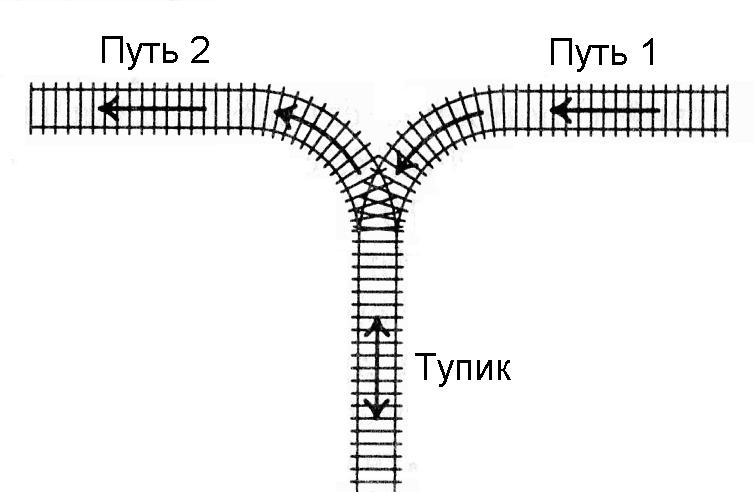

In [148]:
Image(filename='./pictures/36.png')

Известно, в каком порядке изначально идут вагоны поезда. Требуется с помощью указанных операций сделать так, чтобы вагоны поезда шли по порядку (сначала первый, потом второй и т.д., считая от головы поезда, едущего по пути 2 в сторону от тупика). Напишите программу, определяющую, можно ли это сделать.

**Формат ввода:**  
Вводится число N — количество вагонов в поезде (1 ≤ N ≤ 100). Дальше идут номера вагонов в порядке от головы поезда, едущего по пути 1 в сторону тупика. Вагоны пронумерованы натуральными числами от 1 до $N$, каждое из которых встречается ровно один раз.

**Формат вывода:**  
Если сделать так, чтобы вагоны шли в порядке от 1 до $N$, считая от головы поезда, когда поезд поедет по пути 2 из тупика, можно, выведите сообщение YES, если это сделать нельзя, выведите NO.

**Пример 1:**  
Ввод | Вывод  
-----|------
3<br>3 2 1 | YES

**Пример 2:**  
Ввод | Вывод  
-----|------
4<br>4 1 3 2 | YES

**Пример 3:**  
Ввод | Вывод  
-----|------
3<br>2 3 1 | NO


***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([14. Сортировка вагонов lite](https://contest.yandex.ru/contest/45468/problems/14/))***

In [149]:
def read_input_file(input_file):
    """Читает входные данные из файла и возвращает список номеров вагонов"""
    with open(input_file, 'r') as file:
        file.readline()  # Пропускаем первую строку, которая содержит кол-во вагонов
        nums = list(map(int, file.readline().split()))
        return nums

def can_sort_train_with_stack(nums):
    """Проверяет, можно ли упорядочить вагоны по возрастанию, заданным способом"""
    if len(nums) == 1:
        return True

    stack = []
    next_expected = 1
    for num in nums:
        if num == next_expected:
            next_expected += 1
            while stack and stack[-1] == next_expected:
                stack.pop()
                next_expected += 1
        else:
            stack.append(num)
    return not stack

def solution(input_file):
    """Основная функция, выполняющая задачу, основываясь на данных из файла"""
    nums = read_input_file(input_file)
    result = can_sort_train_with_stack(nums)
    return 'YES' if result else 'NO'

# print(solution('input.txt'))  # Код для контекста закомментирован


In [150]:
print(solution(TEST_FOLDER + 'test_36_01.txt'))

YES


In [151]:
print(solution(TEST_FOLDER + 'test_36_02.txt'))

YES


In [152]:
print(solution(TEST_FOLDER + 'test_36_03.txt'))

NO


### Задача 37. Конвейер

тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Для транспортирования материалов из цеха А в цех В используется конвейер. Материалы упаковываются в одинаковые контейнеры и размещаются на ленте один за одним в порядке изготовления в цехе А. Каждый контейнер имеет степень срочности обработки в цехе В. Для упорядочивания контейнеров по степени срочности используют накопитель, который находится в конце конвейера перед входом в цех В. Накопитель работает пошагово, на каждом шаге возможны следующие действия:
- накопитель перемещает первый контейнер из ленты в цех В;
- накопитель перемещает первый контейнер из строки в склад (в складе каждый следующий контейнер помещается на предыдущий);
- накопитель перемещает верхний контейнер из склада в цех В.

Напишите программу, которая по последовательности контейнеров определит, можно ли упорядочить их по степени срочности пользуясь описанным накопителем.

**Формат ввода:**  
Входной файл в первой строке содержит количество тестов $N$. Далее следует $N$ строк, каждый из которых описывает отдельный тест и содержит целое число $K$ (1 ≤ $K$ ≤ 10000) - количество контейнеров в последовательности и $K$ действительных чисел — степеней срочности контейнеров в порядке их поступления из цеха А (меньшим числам соответствует большая степень срочности).

**Формат вывода:**  
Каждая строка выходного файла должна содержать ответ для одного теста. Необходимо вывести 1, если необходимое упорядочивание возможно, или 0 в противном случае.

**Пример:**  
Ввод | Вывод  
-----|------
2<br>2 2.9 2.1<br>3 5.6 9.0 2.0 | 1<br>0

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион A ([11. Конвейер](https://contest.yandex.ru/contest/45469/problems/11/))***


In [153]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    tests = []
    with open(input_file, 'r') as file:
        num_tests = int(file.readline().strip())  # Читаем количество тестов
        for _ in range(num_tests):
            urgencies = list(map(float, file.readline().split()))
            tests.append(urgencies[1:])
    return tests

def simulate_stack_sorting(input_line):
    """Имитирует сортировку с использованием стека"""
    output_line = []
    stack = [input_line[0]]

    for i in input_line:
        while len(stack) and stack[-1] < i:
            output_line.append(stack.pop())
        stack.append(i)

    while stack:
        output_line.append(stack.pop())

    return output_line

def is_valid_sorted(sorted_line):
    """Проверяет, упорядочен ли список в неубывающем порядке."""
    return all(sorted_line[i] <= sorted_line[i+1] for i in range(len(sorted_line) - 1))

def can_sort_with_stack(urgencies):
    """Проверяет, можно ли упорядочить контейнеры по степени срочности используя стэк"""
    sorted_urgencies = simulate_stack_sorting(urgencies)
    return is_valid_sorted(sorted_urgencies)

def solution(input_file):
    """Основная функция, выполняющая задачу, основываясь на данных из файла"""
    tests = read_input_file(input_file)
    results = []
    for urgencies in tests:
        result = 1 if can_sort_with_stack(urgencies) else 0
        results.append(str(result))
    return '\n'.join(results)

# print(solution('input.txt'))   # Код для контекста закомментирован


In [154]:
print(solution(TEST_FOLDER + 'test_37_01.txt'))

1
0


### Задача 38. Великое Лайнландское переселение

тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Лайнландия представляет из себя одномерный мир, являющийся прямой, на котором располагаются N городов, последовательно пронумерованных от 0 до $N-1$. Направление в сторону от первого города к нулевому названо западным, а в обратную - восточным.  
Когда в Лайнландии неожиданно начался кризис, все были жители мира стали испытывать глубокое смятение. По всей Лайнландии стали ходить слухи, что на востоке живётся лучше, чем на западе.  
Так и началось Великое Лайнландское переселение. Обитатели мира целыми городами отправились на восток, покинув родные улицы, и двигались до тех пор, пока не приходили в город, в котором средняя цена проживания была меньше, чем в родном.

**Формат ввода:**  
Первая строка содержит число $N$ (2 ≤ $N$ ≤ $10^5$) — количество городов в Лайнландии. Во второй строке дано $N$ чисел $a_i$ (0 ≤ $a_i$ ≤ $10^9$)— средняя цена проживания в городах с нулевого по $(N-1)$-ый соответственно.

**Формат вывода:**  
Для каждого города в порядке с нулевого по $(N-1)$-ый выведите номер города, в который переселятся его изначальные жители. Если жители города не остановятся в каком-либо другом городе, отправившись в Восточное Бесконечное Ничто, выведите -1

**Пример:**  
Ввод | Вывод  
-----|------
10<br>1 2 3 2 1 4 2 5 3 1 | -1 4 3 4 -1 6 9 8 9 -1

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([15. Великое Лайнландское переселение](https://contest.yandex.ru/contest/45468/problems/15/))***


In [155]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        n = int(file.readline())
        nums = list(map(int, file.readline().split()))
        return n, nums

def find_next_city_in_east_with_lower_cost(n, cost_living_cities):
    """Определяет для каждого города индекс следующего города на востоке с меньшей средней стоимостью жизни"""
    stack = []
    result = [-1] * n
    for i, cost in enumerate(cost_living_cities):
        while stack and cost < stack[-1][1]:
            index_of_city_to_update = stack.pop()[0]  # Индекс города, для которого найден более дешевый город справа
            result[index_of_city_to_update] = i  # Обновляем индекс искомого города с меньшей стоимостью жизни
        stack.append((i, cost))
    return result

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    n, cost_living_cities = read_input_file(input_file)
    result = find_next_city_in_east_with_lower_cost(n, cost_living_cities)
    return result

# print(*solution('input.txt'))   # Код для контекста закомментирован

In [156]:
print(*solution(TEST_FOLDER + 'test_38_01.txt'))

-1 4 3 4 -1 6 9 8 9 -1


### Задача 39. Гистограмма и прямоугольник

тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Гистограмма является многоугольником, сформированным из последовательности прямоугольников, выровненных на общей базовой линии. Прямоугольники имеют равную ширину, но могут иметь различные высоты. Например, фигура слева показывает гистограмму, которая состоит из прямоугольников с высотами 2, 1, 4, 5, 1, 3, 3. Все прямоугольники на этом рисунке имеют ширину, равную 1.

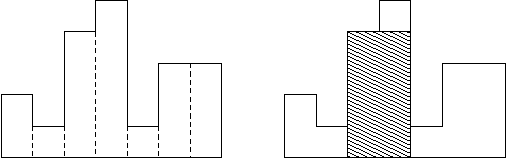

In [157]:
Image(filename='./pictures/39.png')

Обычно гистограммы используются для представления дискретных распределений, например, частоты символов в текстах. Отметьте, что порядок прямоугольников очень важен. Вычислите область самого большого прямоугольника в гистограмме, который также находится на общей базовой линии. На рисунке справа заштрихованная фигура является самым большим выровненным прямоугольником на изображенной гистограмме.

**Формат ввода:**  
В первой строке входного файла записано число $N$ (1 ≤ $N$ ≤ $10^6$) — количество прямоугольников гистограммы.  Затем следует $N$ целых чисел $h_i$ (0 ≤ $h_i$ ≤ $10^9$) Эти числа обозначают высоты прямоугольников гистограммы слева направо. Ширина каждого прямоугольника равна 1.  

**Формат вывода:**  
Выведите площадь самого большого прямоугольника в гистограмме. Помните, что этот прямоугольник должен быть на общей базовой линии.

**Пример:**  
Ввод | Вывод  
-----|------
7 2 1 4 5 1 3 3 | 8

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион A ([14. Гистограмма и прямоугольник](https://contest.yandex.ru/contest/45469/problems/14/))***

In [158]:
def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        nums = list(map(int, file.readline().split()))
        n = nums[0]
        return n, nums[1:]

def find_next_right_lower(n, nums):
    """Определяет для каждого бина гистограммы индексы следующего минимального справа"""
    stack = []  # Используем стек для хранения индексов для которых мы пока не нашли ответ
    next_right_lower = [n] * n
    for i in range(n):
        height = nums[i]
        while stack and height < stack[-1][1]:
            index_to_update = stack.pop()[0]
            next_right_lower[index_to_update] = i
        stack.append((i, height))
    return next_right_lower

def find_next_left_lower(n, nums):
    """Определяет для каждого бина гистограммы индексы следующего минимального слева"""
    stack = []  # Используем стек для хранения индексов для которых мы пока не нашли ответ
    next_left_lower = [-1] * n
    for i in range(n-1,-1,-1):
        height = nums[i]
        while stack and height < stack[-1][1]:
            index_to_update = stack.pop()[0]
            next_left_lower[index_to_update] = i
        stack.append((i, height))
    return next_left_lower

def find_max_square(n, nums):
    """Находит максимальный по площади прямоугольник"""
    next_right_lower = find_next_right_lower(n, nums)
    next_left_lower = find_next_left_lower(n, nums)
    max_square = 0
    for i in range(len(nums)):
        hight_rectangle = nums[i]
        width_rectangle = (next_right_lower[i] - next_left_lower[i] - 1)
        current_square = hight_rectangle * width_rectangle
        max_square = max(max_square, current_square)
    return max_square

def solution(input_file):
    """Основная функция, выполняющая задачу"""
    n, nums = read_input_file(input_file)
    result = find_max_square(n, nums)
    return result

# print(solution('input.txt'))   # Код для контекста закомментирован

In [159]:
print(solution(TEST_FOLDER + 'test_39_01.txt'))

8


### Задача 40. Значение арифметического выражения

тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Задано числовое выражение. Необходимо вычислить его значение или установить, что оно содержит ошибку. В выражении могут встречаться знаки сложения, вычитания, умножения, скобки и пробелы (пробелов внутри чисел быть не должно). Приоритет операций стандартный. Все числа в выражении целые и по модулю не превосходят $2 \times 10^9$. Также гарантируется, что все промежуточные вычисления также не превосходят $2 \times 10^9$.

**Формат ввода:**  
В первой строке вводится выражение. Его длина не превосходит 100 знаков. После выражения идет переход на новую строчку.

**Формат вывода:**  
Выведите значение этого выражения или слово "WRONG" если значение не определено.

**Пример 1:**  
Ввод | Вывод  
-----|------
1+(2*2 - 3) | 2

**Пример 2:**  
Ввод | Вывод  
-----|------
1+a+1 | WRONG

**Пример 3:**  
Ввод | Вывод  
-----|------
1 1 + 2 | WRONG

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион A ([12. Значение арифметического выражения](https://contest.yandex.ru/contest/45469/problems/12/))***

In [160]:
POSIBLE_SYMBOLS = '1234567890+-*() '

def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        return file.read().strip()

def check_correct_expression_and_transform_to_tokens(expression):
    """Преобразует строку в список токенов для дальнейшего анализа, проверяя на корректность символы и структуру"""
    bracket_balance = 0
    tokens = []
    i = 0
    while i < len(expression):
        char = expression[i]
        if char not in POSIBLE_SYMBOLS:
            return None
        if char == ' ':
            i += 1
            continue
        if char == '(':
            if tokens and str(tokens[-1]) not in '(*+-':
                return None
            bracket_balance += 1
        if char == ')':
            bracket_balance -= 1
            if bracket_balance < 0 or str(tokens[-1]) in '(*+-':
                return None
        if char in '+-*':
            if not tokens or str(tokens[-1]) in '(*+-':
                return None
        else:
            num = ''
            while i < len(expression) and expression[i].isdigit():
                num += expression[i]
                i += 1
            if num:
                tokens.append(int(num))
                continue

        tokens.append(char)
        i += 1
    if bracket_balance != 0 or str(tokens[-1]) in '*+-':
        return None
    return tokens

def to_polish_notation(tokens):
    """Преобразует проверенное выражение в виде списка токенов в обратную польскую запись"""
    if tokens is None:
        return None
    priority = {'*': 2, '+': 1, '-': 1}
    stack = []
    output = []
    for token in tokens:
        if isinstance(token, int):
            output.append(token)
        elif token in '*+-':
            while stack and stack[-1] != '(' and priority[stack[-1]] >= priority[token]:
                output.append(stack.pop())
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()
    while stack:
        output.append(stack.pop())
    return output

def evaluate_expression(expression):
    """Вычисляет значение выражения, заданного в обратной польской нотации."""

    tokens = check_correct_expression_and_transform_to_tokens(expression)
    notation = to_polish_notation(tokens)

    if notation is None:
        return 'WRONG'

    stack = []
    operations = {'*': lambda x, y: x * y,
                  '+': lambda x, y: x + y,
                  '-': lambda x, y: x - y}
    for element in notation:
        if element in operations:
            right = stack.pop()
            left = stack.pop()
            stack.append(operations[element](left, right))
        else:
            stack.append(element)
    return stack[0] if len(stack) == 1 else 'WRONG'

def main(input_file):
    """Основная функция, выполняющая задачу."""
    expression = read_input_file(input_file)
    result = evaluate_expression(expression)
    return result

# print(main('input.txt'))   # Код для контекста закомментирован

In [161]:
print(main(TEST_FOLDER + 'test_40_01.txt'))

2


In [162]:
print(main(TEST_FOLDER + 'test_40_02.txt'))

WRONG


In [163]:
print(main(TEST_FOLDER + 'test_40_03.txt'))

WRONG


### Задача 41. Значение логического выражения

тема: стэки

Ограничение времени: 1 секунда  
Ограничение памяти: 256Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Задано логическое выражение. Необходимо вычислить его значение. В выражении могут встречаться знаки ! (отрицание), & (логическое «и»), | (логическое «или»), ̂ (XOR — «исключающее ИЛИ», «ровно одно из двух — истина») и скобки. Самый высокий приоритет у отрицания, меньше – у &, операции | и ̂ имеют самый низкий приоритет (одинаковый) и вычисляются слева направо. Все числа в выражении либо 0, либо 1.

**Формат ввода:**  
В первой строке вводится выражение. Его длина не превосходит 100 знаков. После выражения идет переход на новую строчку.

**Формат вывода:**  
Выведите значение этого выражения (0 или 1).

**Пример:**  
Ввод | Вывод  
-----|------
1\|(0&0^1) | 1

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион A ([13. Значение логического выражения](https://contest.yandex.ru/contest/45469/problems/13/))***

In [164]:
POSIBLE_SYMBOLS = '!^&|()'
PRIORITY = {'!': 3, '&': 2, '|': 1, '^': 1}

def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        return file.read().strip()

def to_tokens(expression: str):
    """Преобразует выражение в строком виде в список токенов"""
    tokens = []
    int_by_string = {'0':0,
                     '1':1}

    for c in expression:
        if c in POSIBLE_SYMBOLS:
            tokens.append(c)
            continue
        tokens.append(int_by_string[c])

    return tokens

def to_polish_notation(tokens):
    """Преобразует выражение в виде списка токенов в обратную польскую запись"""

    stack = []
    output = []
    for token in tokens:
        if isinstance(token, int):
            output.append(token)
        elif token in '!&|^':
            while stack and stack[-1] != '(' and PRIORITY[stack[-1]] >= PRIORITY[token]:
                output.append(stack.pop())
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()
    while stack:
        output.append(stack.pop())
    return output

def evaluate_expression(expression):
    """Вычисляет значение выражения, заданного в обратной польской нотации"""

    tokens = to_tokens(expression)
    notation = to_polish_notation(tokens)

    stack = []
    operations_without_negation = {
        '&': lambda x1, x2: x1 & x2,
        '|': lambda x1, x2: x1 | x2,
        '^': lambda x1, x2: x1 ^ x2
    }

    for element in notation:
        if element == '!':
            stack.append(int(not stack.pop()))
        elif element in operations_without_negation:
            right = stack.pop()
            left = stack.pop()
            stack.append(operations_without_negation[element](left, right))
        else:
            stack.append(element)
    return stack.pop()

def main(input_file):
    """Основная функция, выполняющая задачу"""
    expression = read_input_file(input_file)
    result = evaluate_expression(expression)
    return result

# print(main('input.txt'))   # Код для контекста закомментирован

In [165]:
print(main(TEST_FOLDER + 'test_41_01.txt'))

1


### Задача 42. Очередь с защитой от ошибок

тема: очереди

Ограничение времени: 1 секунда  
Ограничение памяти: 64Mb  
Ввод: стандартный ввод или input.txt  
Вывод: стандартный вывод или output.txt  

Научитесь пользоваться стандартной структурой данных queue для целых чисел. Напишите программу, содержащую описание очереди и моделирующую работу очереди, реализовав все указанные здесь методы.

Программа считывает последовательность команд и в зависимости от команды выполняет ту или иную операцию. После выполнения каждой команды программа должна вывести одну строчку.

Возможные команды для программы:

- `push n`: Добавить в очередь число $n$ (значение $n$ задается после команды). Программа должна вывести "ok".
- `pop`: Удалить из очереди первый элемент. Программа должна вывести его значение.
- `front`: Программа должна вывести значение первого элемента, не удаляя его из очереди.
- `size`: Программа должна вывести количество элементов в очереди.
- `clear`: Программа должна очистить очередь и вывести "ok".
- `exit`: Программа должна вывести "bye" и завершить работу.

Перед исполнением операций `front` и `pop` программа должна проверять, содержится ли в очереди хотя бы один элемент. Если во входных данных встречается операция `front` или `pop`, и при этом очередь пуста, то программа должна вместо числового значения вывести строку "error".

**Формат ввода:**  
Вводятся команды управления очередью, по одной на строке.

**Формат вывода:**  
Требуется вывести протокол работы очереди, по одному сообщению на строке.

**Пример 1:**  
Ввод | Вывод  
-----|------
push 1<br>front<br>exit | ok<br>1<br>bye

**Пример 2:**  
Ввод | Вывод  
-----|------
size<br>push 1<br>size<br>push 2<br>size<br>push 3<br>size<br>exit | 0<br>ok<br>1<br>ok<br>2<br>ok<br>3<br>bye

**Пример 3:**  
Ввод | Вывод  
-----|------
push 3<br>push 14<br>size<br>clear<br>push 1<br>front<br>push 2<br>front<br>pop<br>size<br>pop<br>size<br>exit | ok<br>ok<br>2<br>ok<br>ok<br>1<br>ok<br>1<br>1<br>1<br>2<br>0<br>bye

***задача c тренировок Яндекса по алгоритмам 3.0 Дивизион B ([16. Очередь с защитой от ошибок](https://contest.yandex.ru/contest/45468/problems/16/))***


In [166]:
class Queue:
    """
    Очередь, реализованная на основе списка с O(1) временем выполнения для операций pop.
    При достижении 10000 неиспользуемых элементов в начале списка происходит его сжатие за O(K),
    где K - количество активных элементов в очереди.
    """
    def __init__(self):
        self.items = []
        self.head_of_queue = 0

    def push(self, value):
        self.items.append(value)
        return "ok"

    def pop(self):
        if self.head_of_queue < len(self.items):
            result = self.items[self.head_of_queue]
            self.head_of_queue += 1

            # Опциональное сжатие для освобождения памяти
            if self.head_of_queue > 10000:
                self.items = self.items[self.head_of_queue:]
                self.head_of_queue = 0
            return result
        return "error"

    def front(self):
        if self.head_of_queue < len(self.items):
            return self.items[self.head_of_queue]
        return "error"

    def size(self):
        return str(len(self.items) - self.head_of_queue)

    def clear(self):
        self.items.clear()
        self.head_of_queue = 0
        return "ok"

def read_input_file(input_file):
    """Читает входные данные из файла"""
    with open(input_file, 'r') as file:
        commands = file.read().split('\n')
    return commands

def process_command(queue, command):
    """Обрабатывает команды управления очередью"""
    if command.startswith('push'):
        value = command.split()[1]
        return queue.push(value)
    elif command == 'pop':
        return queue.pop()
    elif command == 'front':
        return queue.front()
    elif command == 'size':
        return queue.size()
    elif command == 'clear':
        return queue.clear()
    elif command == 'exit':
        return 'bye'

def main(input_file):
    """Основная функция, выполняющая задачу"""
    commands = read_input_file(input_file)
    queue = Queue()
    results = []
    for command in commands:
        result = process_command(queue, command)
        if result == 'bye':
            results.append(result)
            break
        results.append(result)

    return '\n'.join(results)

# print(main('input.txt'))  # Код для контекста закомментирован

In [167]:
print(main(TEST_FOLDER + 'test_42_01.txt'))

ok
1
bye


In [168]:
print(main(TEST_FOLDER + 'test_42_02.txt'))

0
ok
1
ok
2
ok
3
bye


In [169]:
print(main(TEST_FOLDER + 'test_42_03.txt'))

ok
ok
2
ok
ok
1
ok
1
1
1
2
0
bye
